In [1]:
import numpy as np
from scipy import stats
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (16.0, 12.0)
pylab.rcParams['font.size'] = 24

Index(['accident_reference', 'vehicle_reference_x', 'casualty_reference',
       'casualty_class', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty',
       'vehicle_reference_y', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'gene

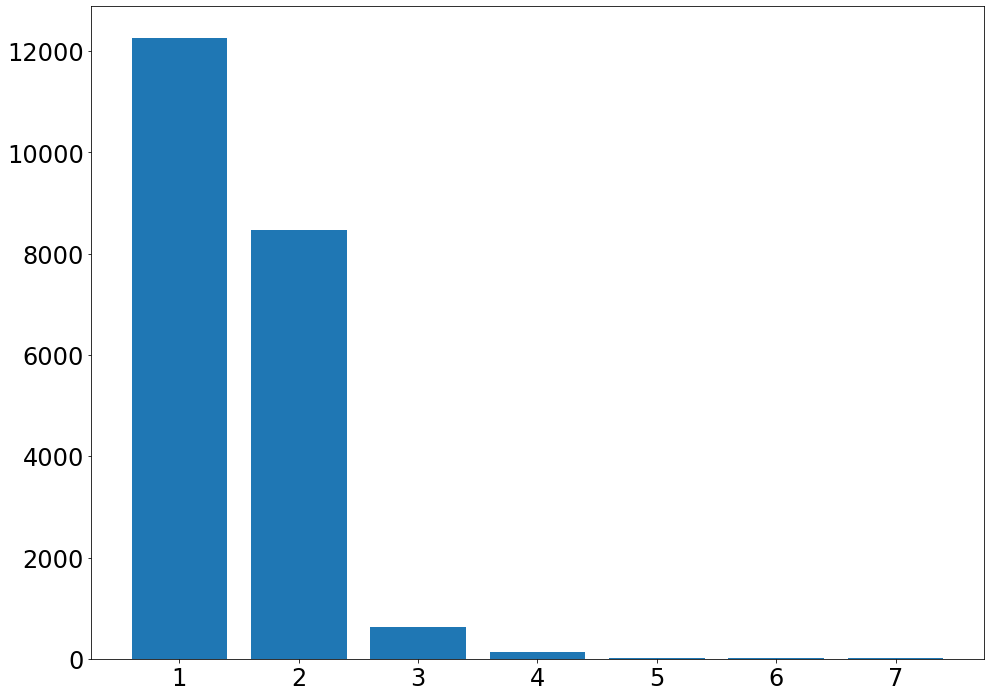

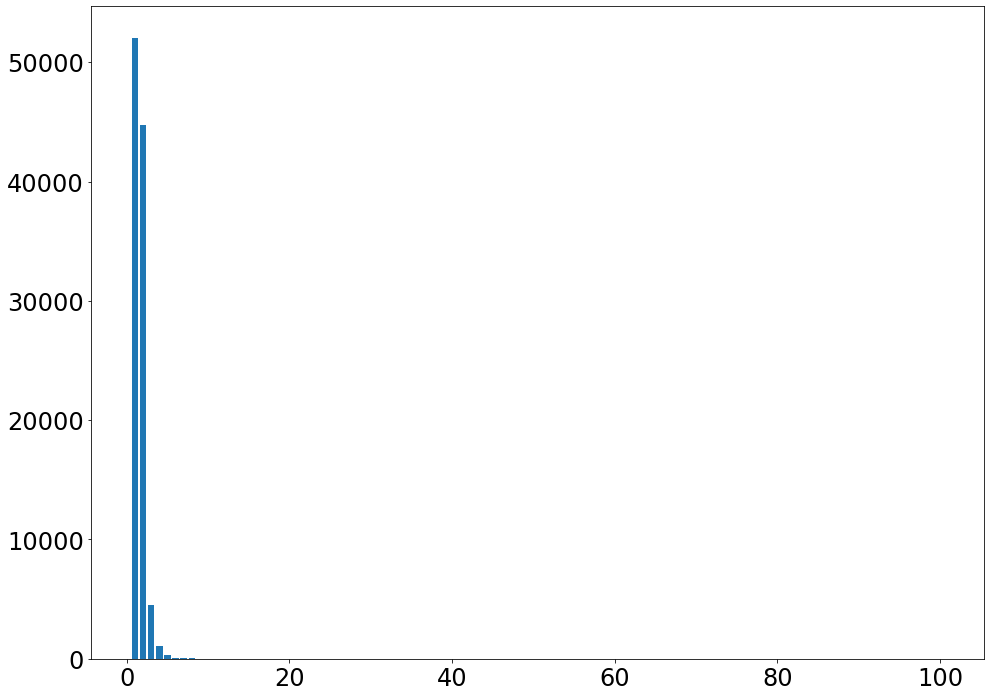

CASUALTY_REFERENCE





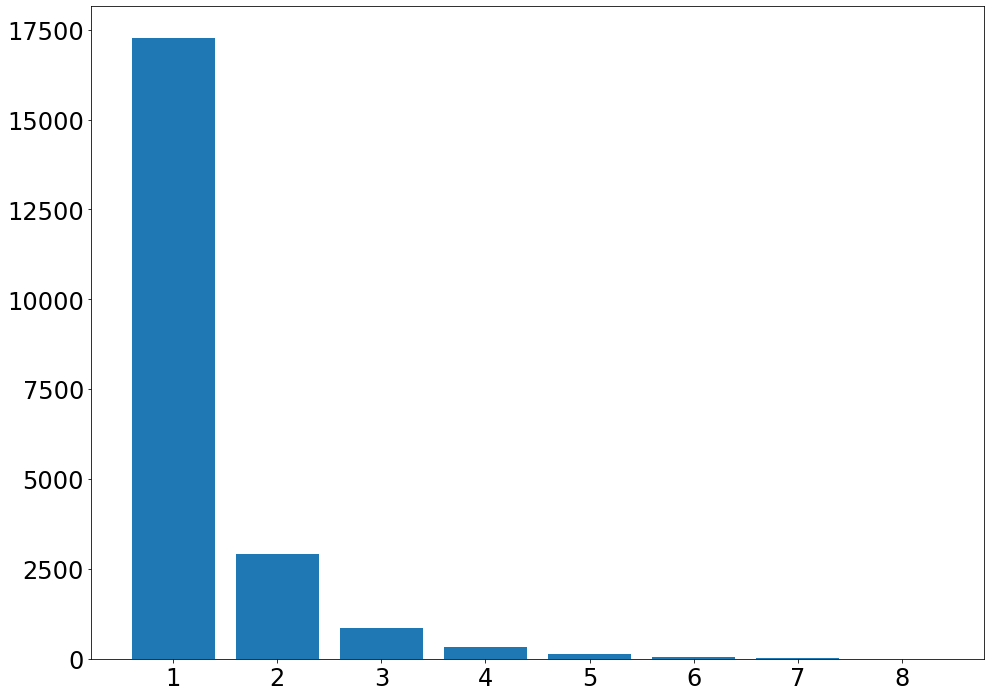

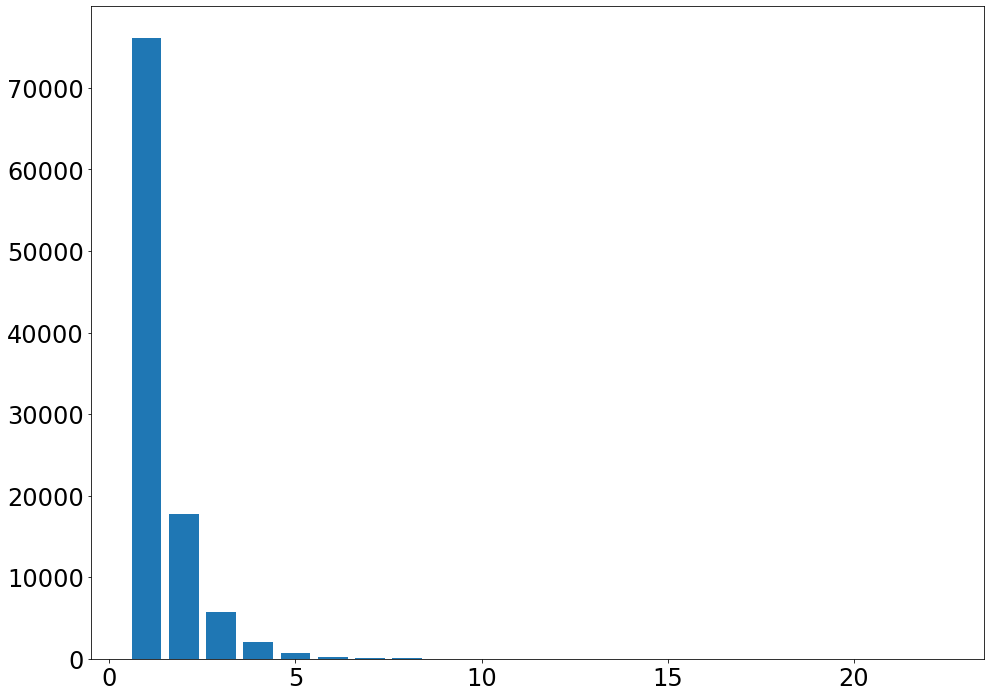

CASUALTY_CLASS





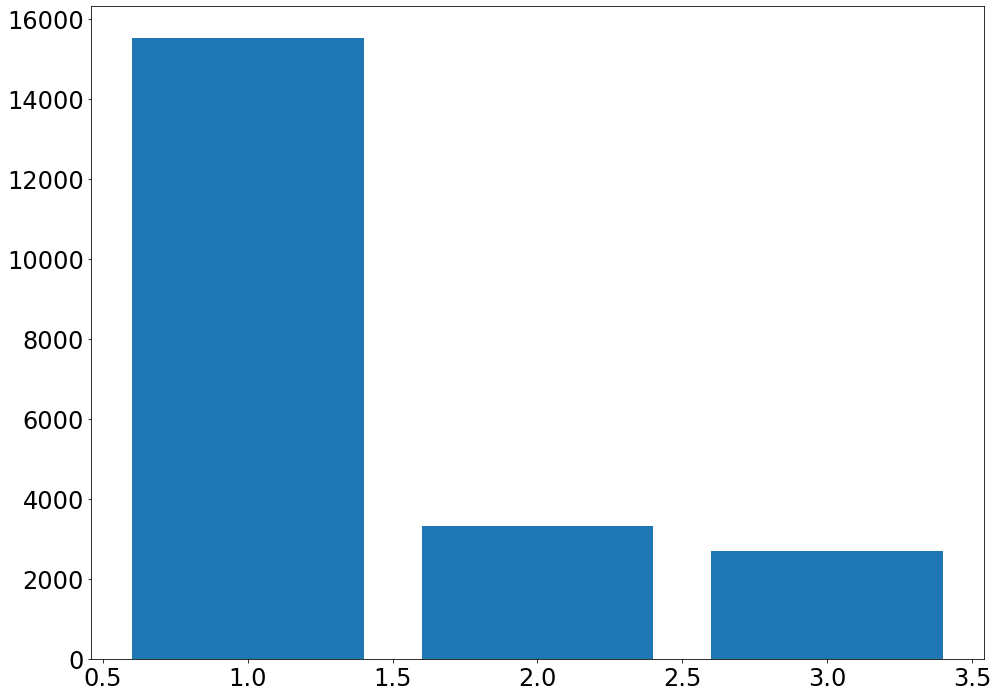

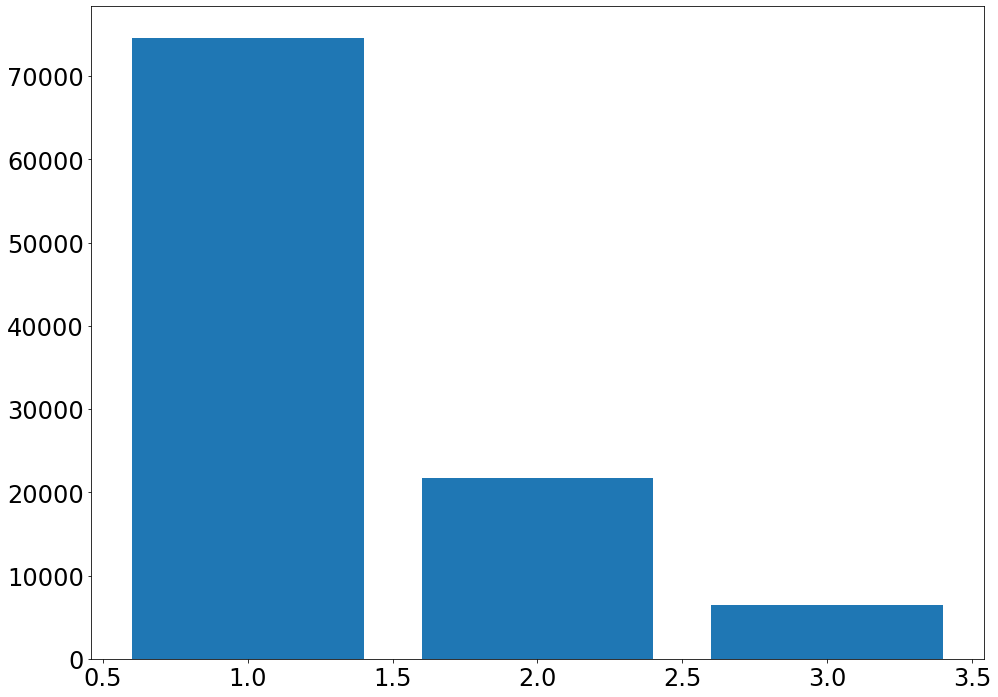

SEX_OF_CASUALTY





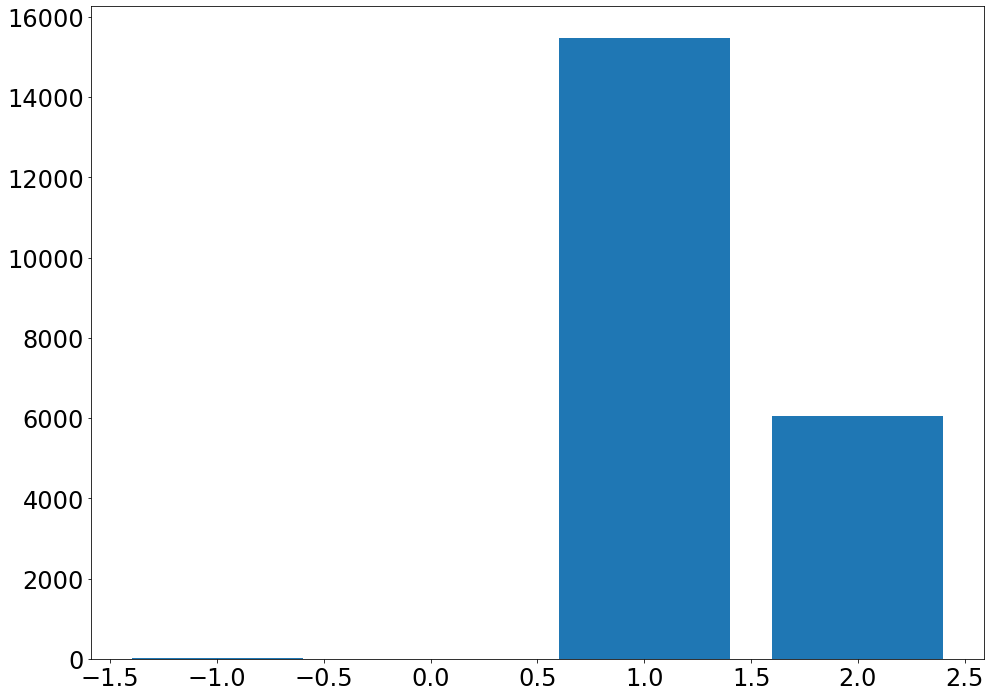

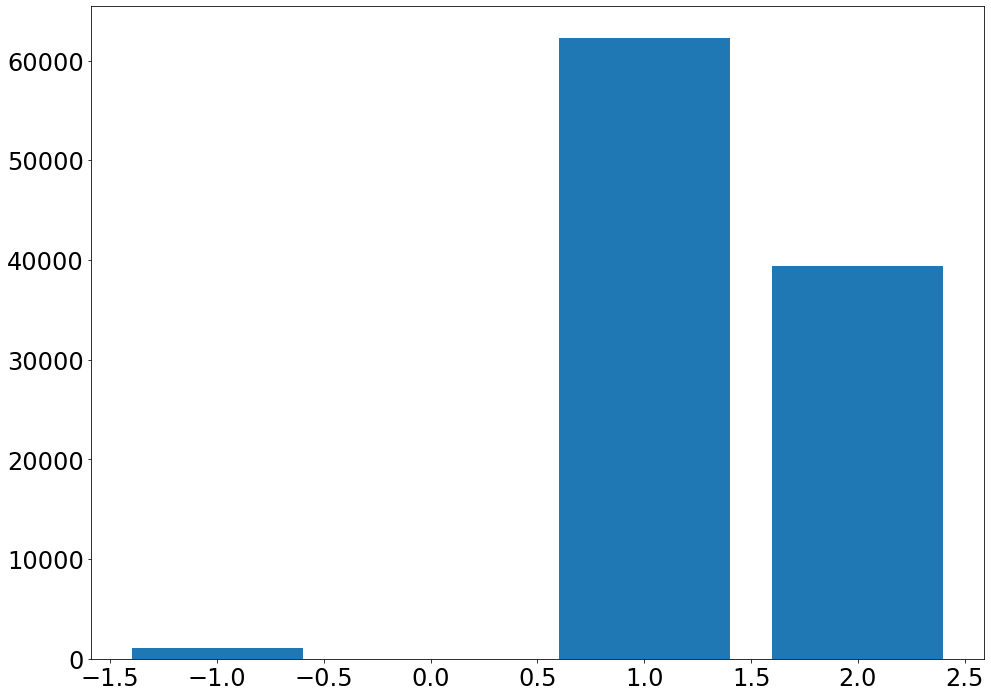

AGE_OF_CASUALTY





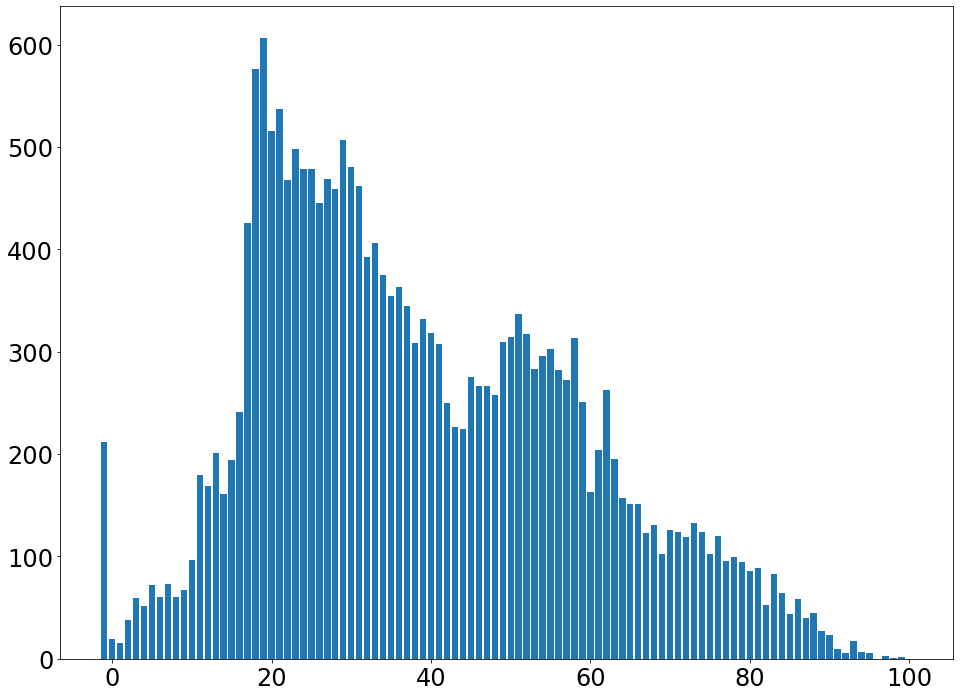

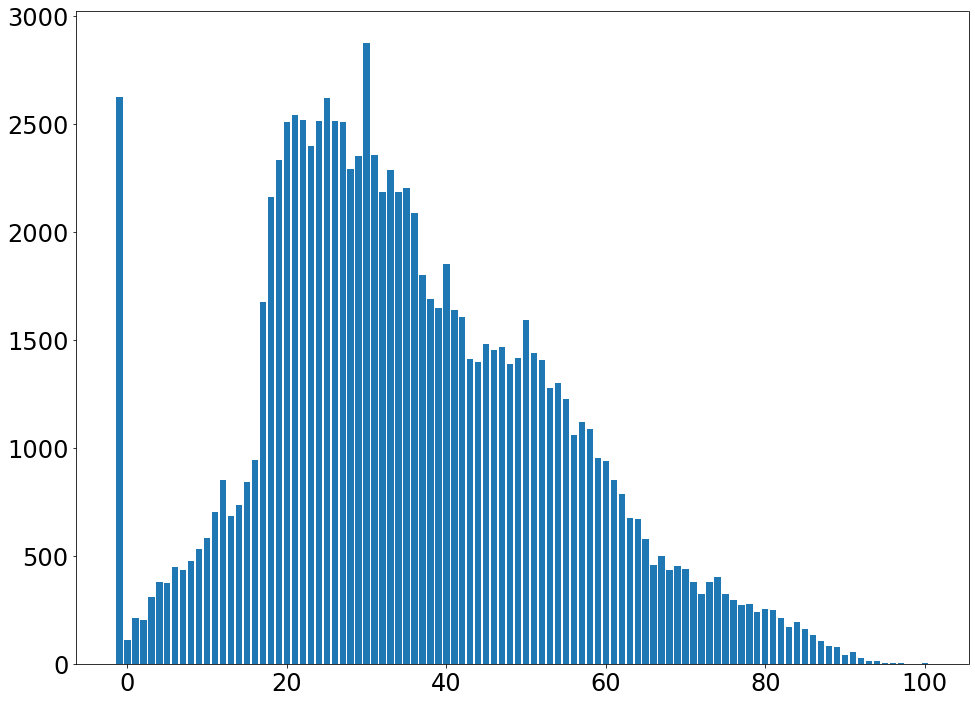

AGE_BAND_OF_CASUALTY





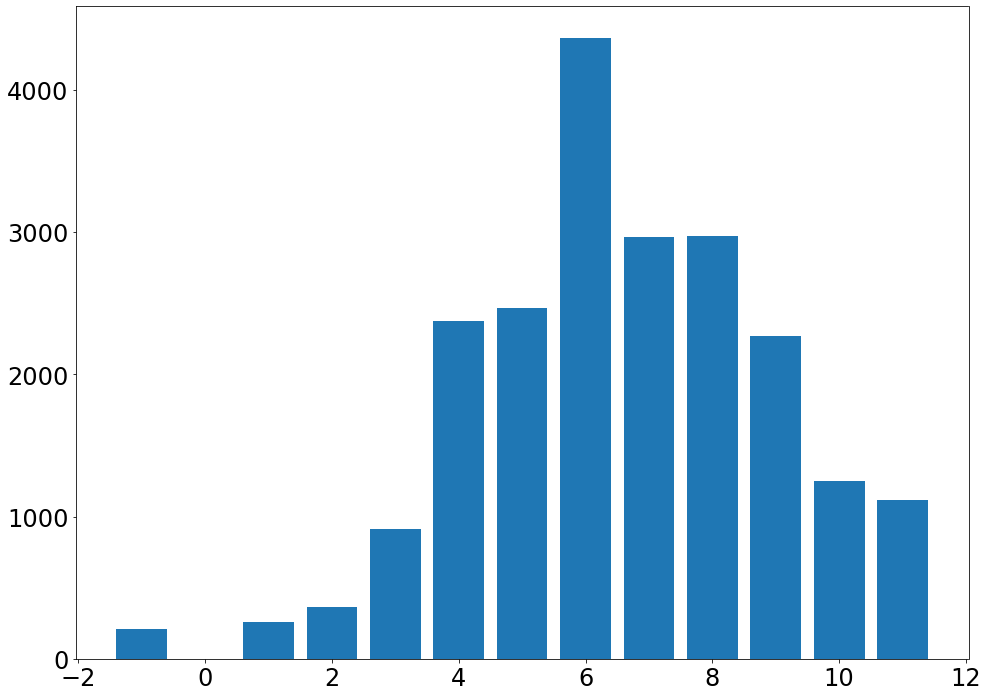

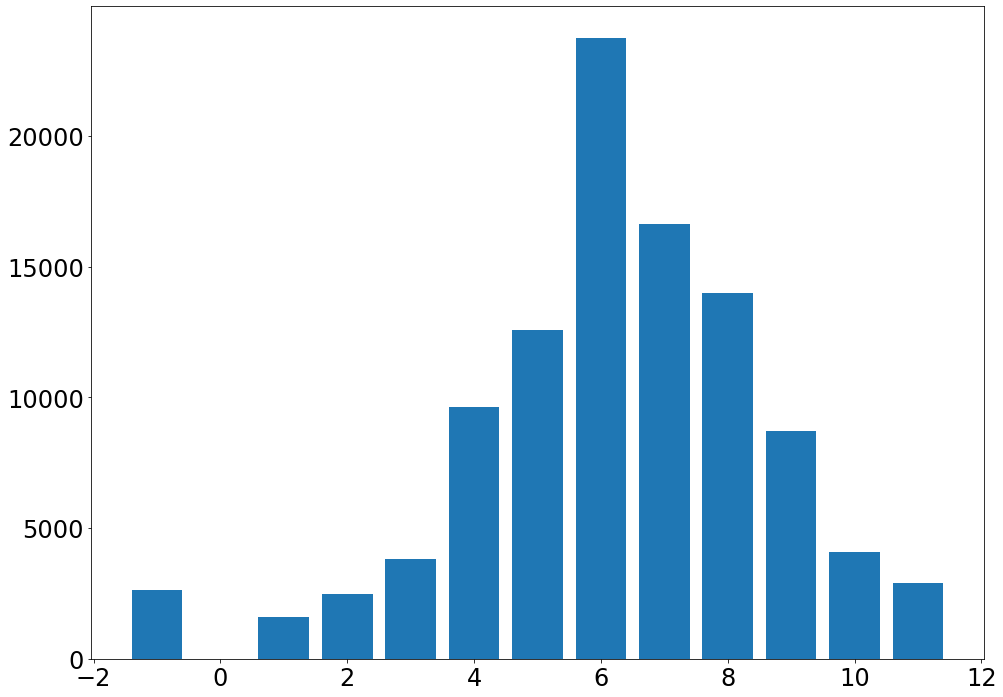

CASUALTY_SEVERITY





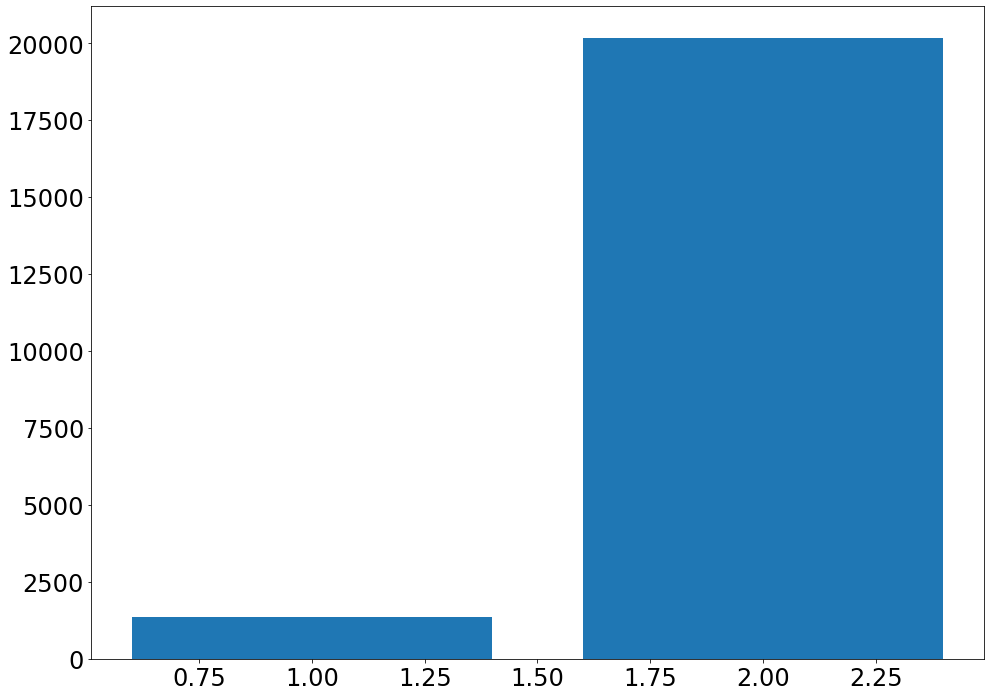

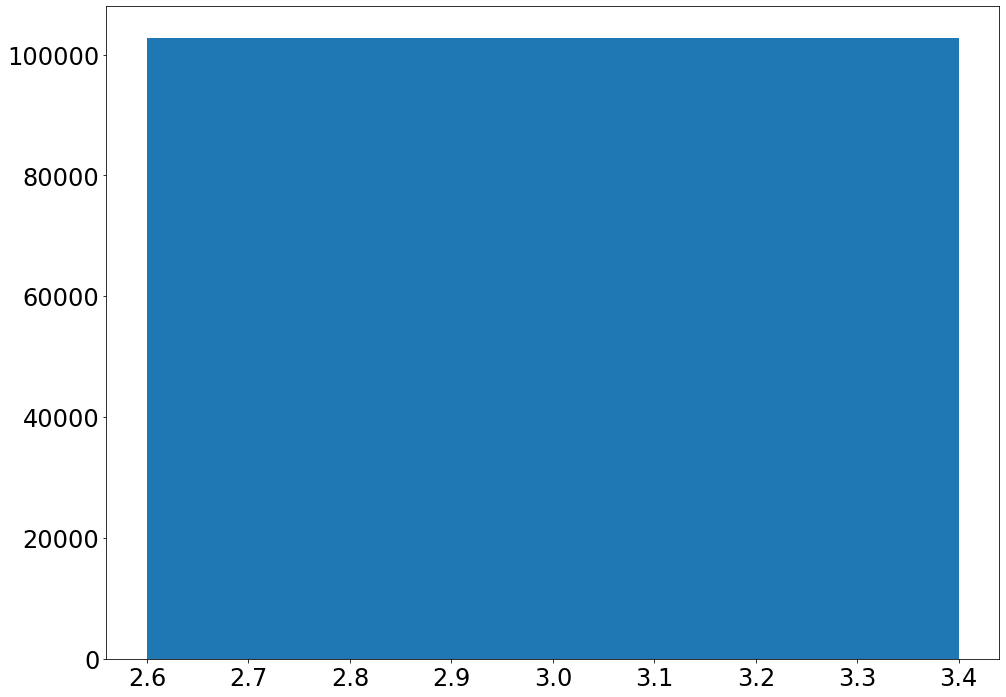

PEDESTRIAN_LOCATION





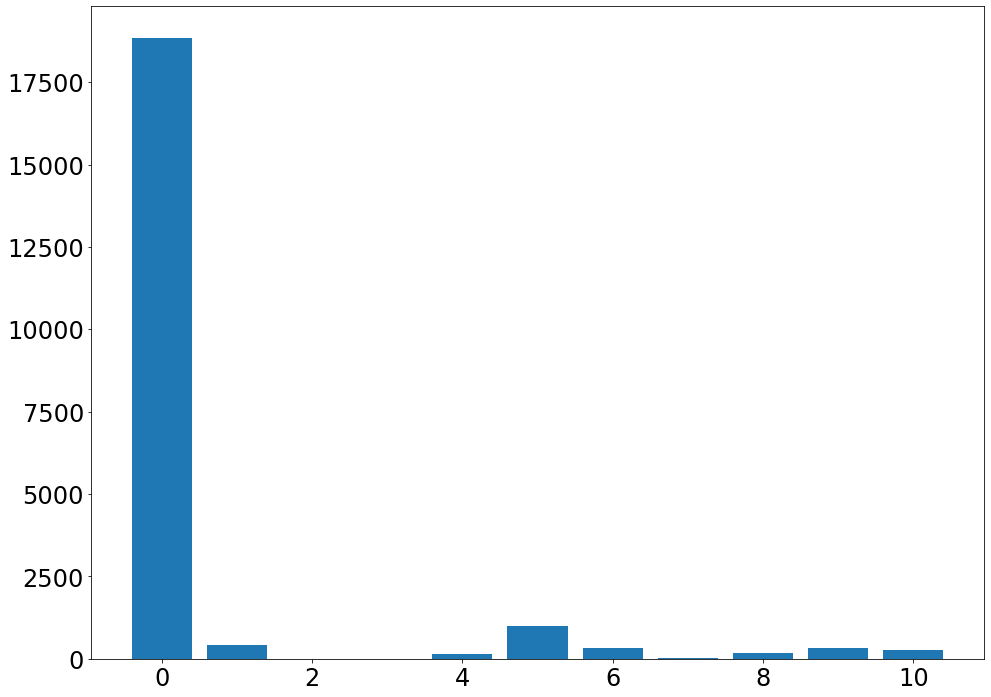

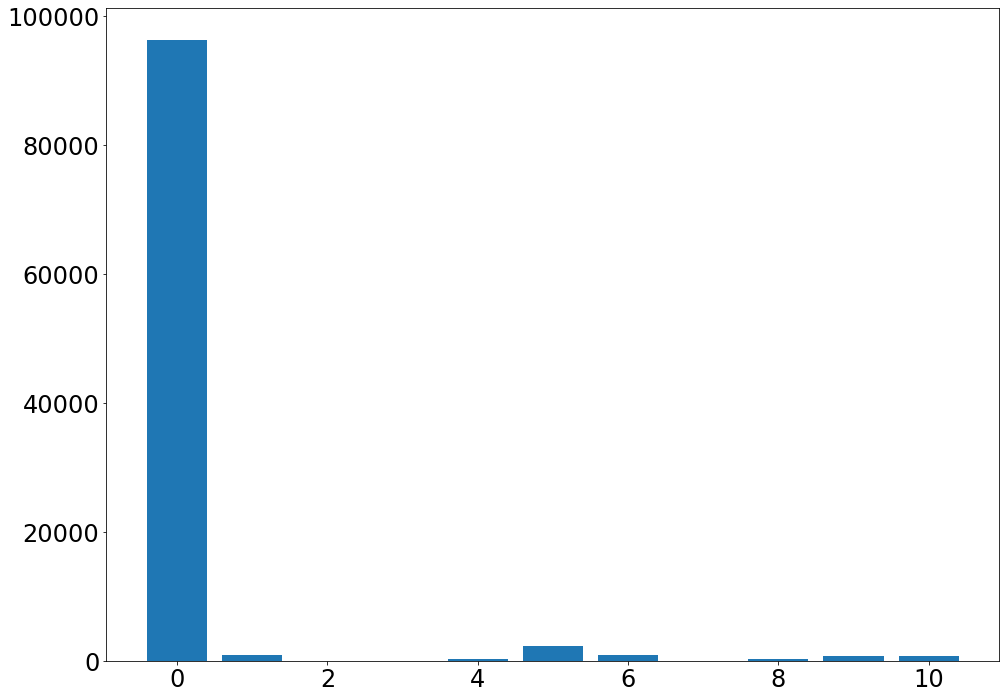

PEDESTRIAN_MOVEMENT





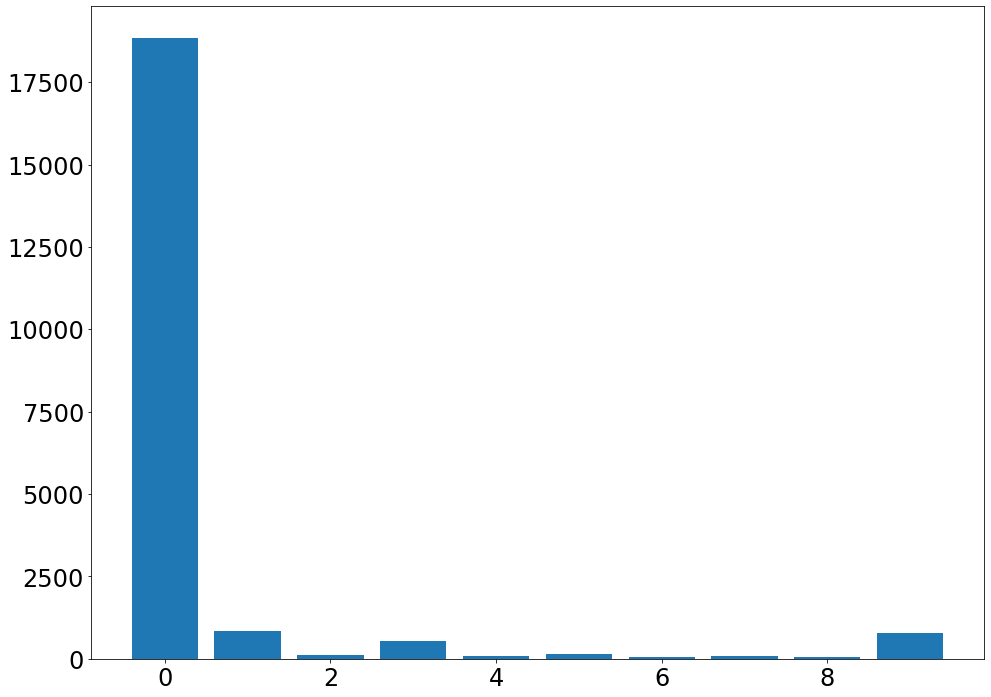

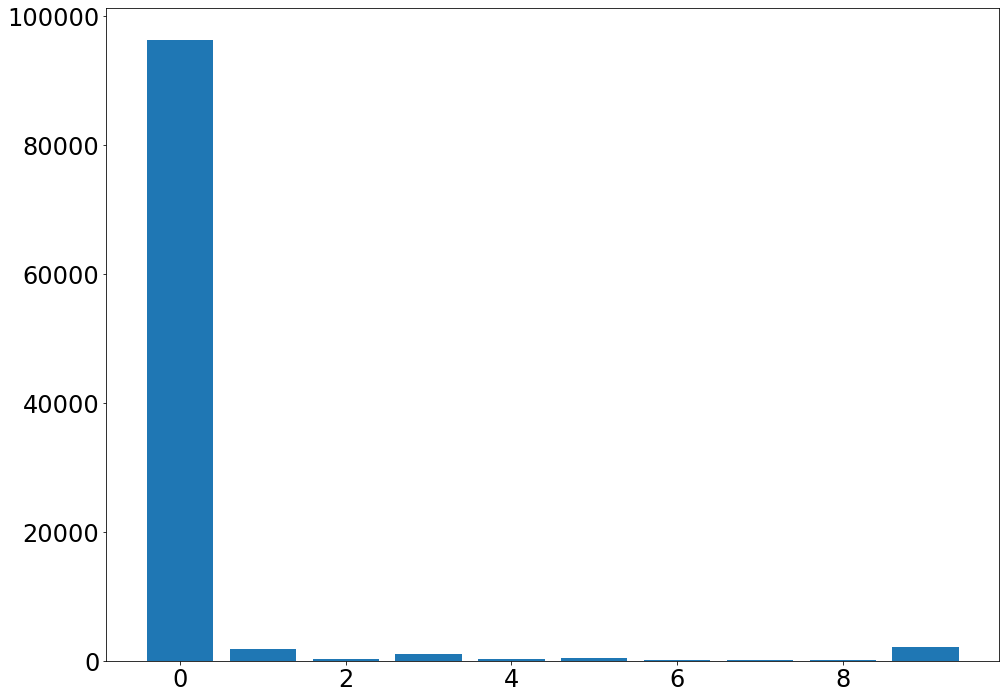

CAR_PASSENGER





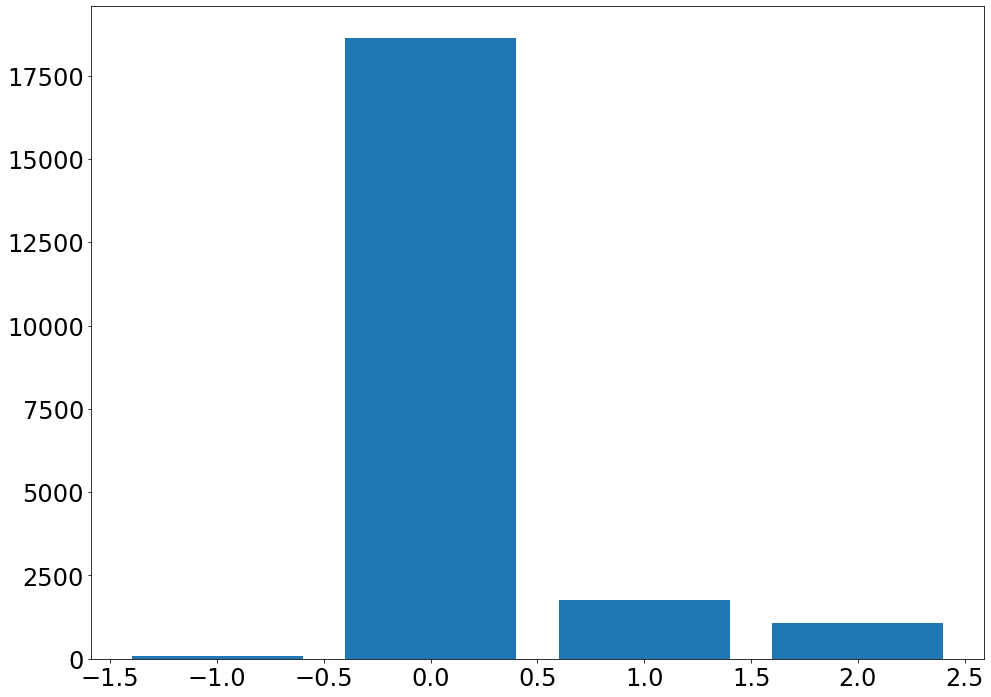

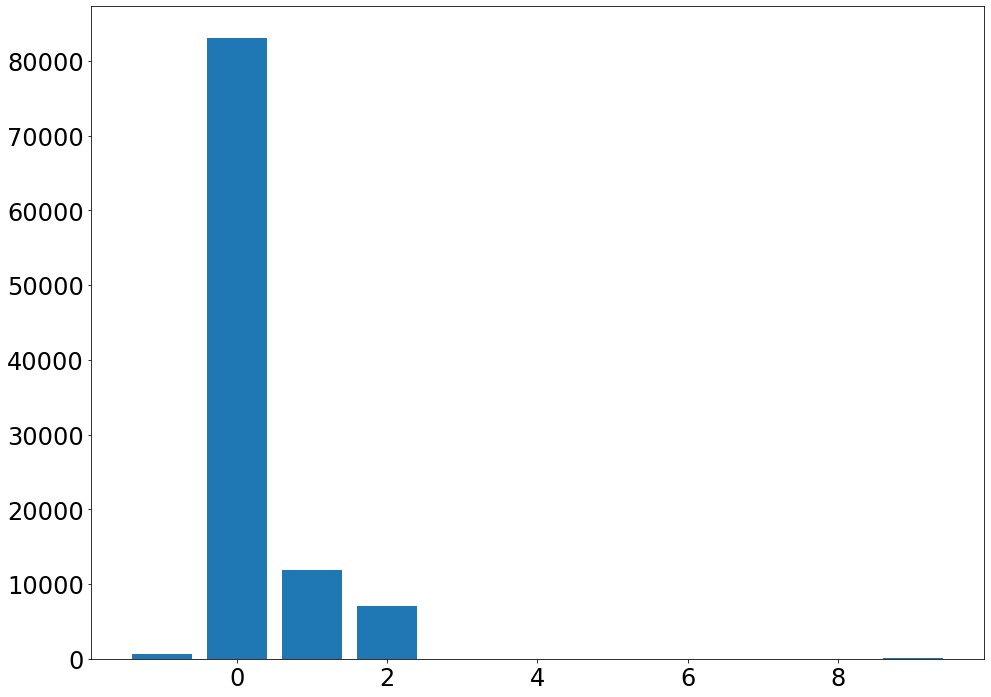

BUS_OR_COACH_PASSENGER





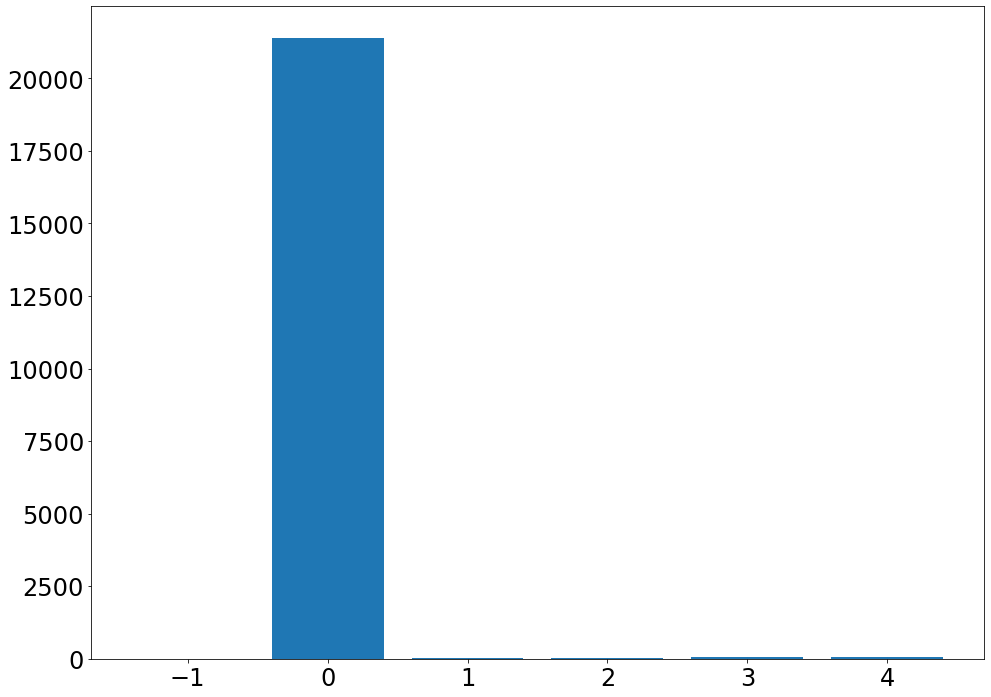

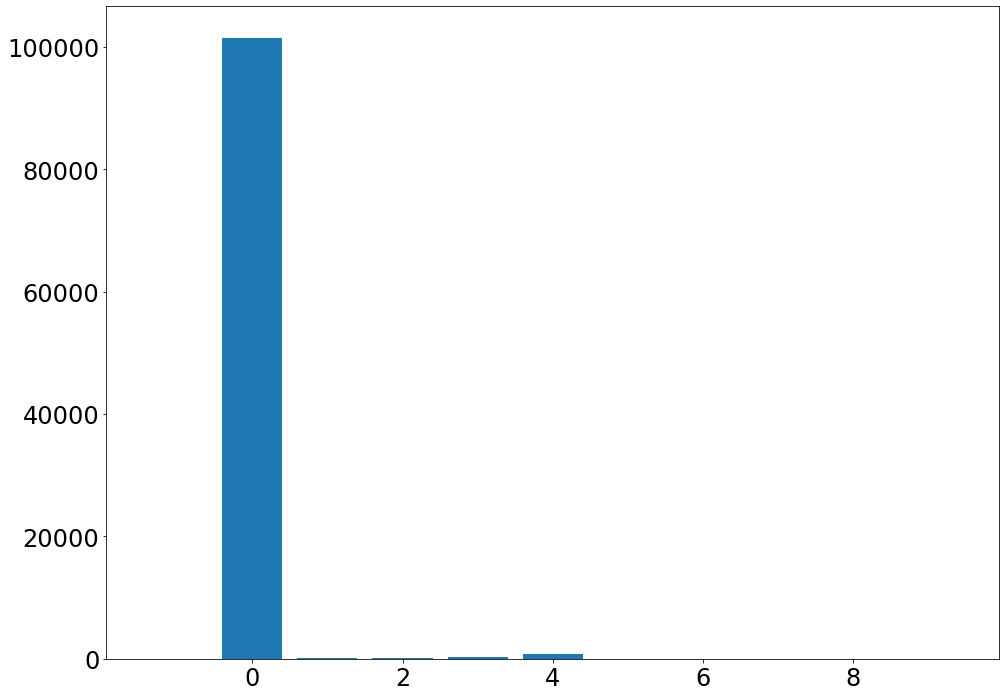

PEDESTRIAN_ROAD_MAINTENANCE_WORKER





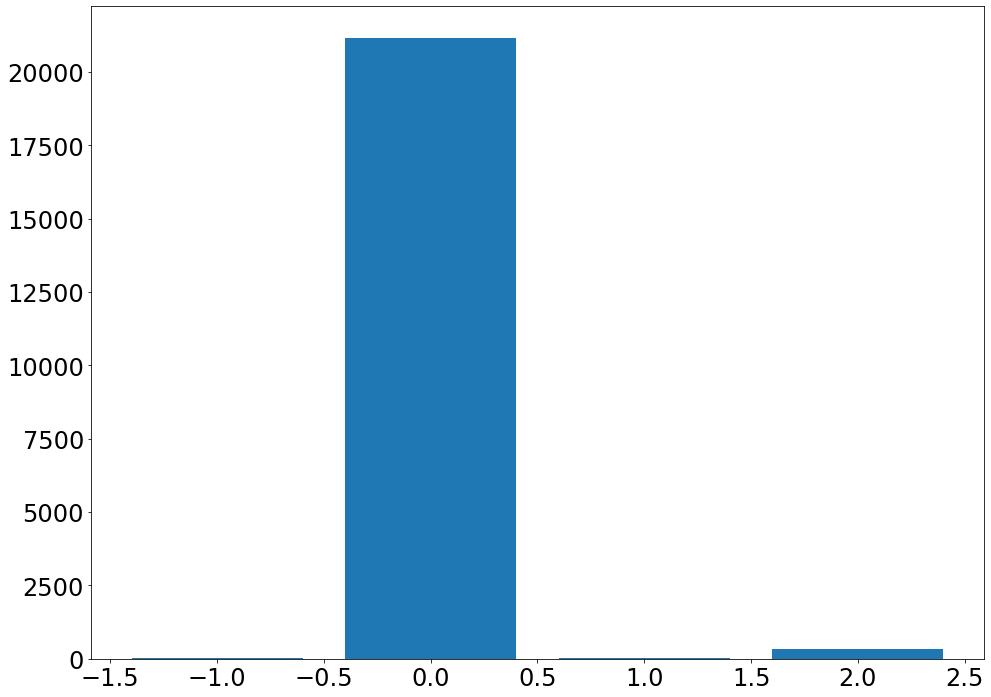

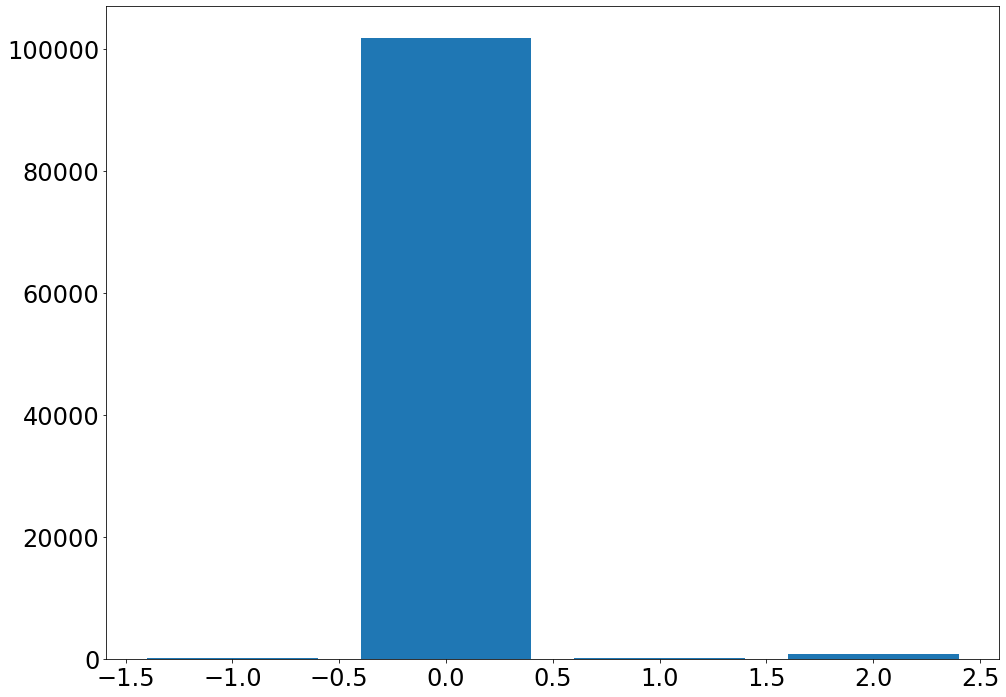

CASUALTY_TYPE





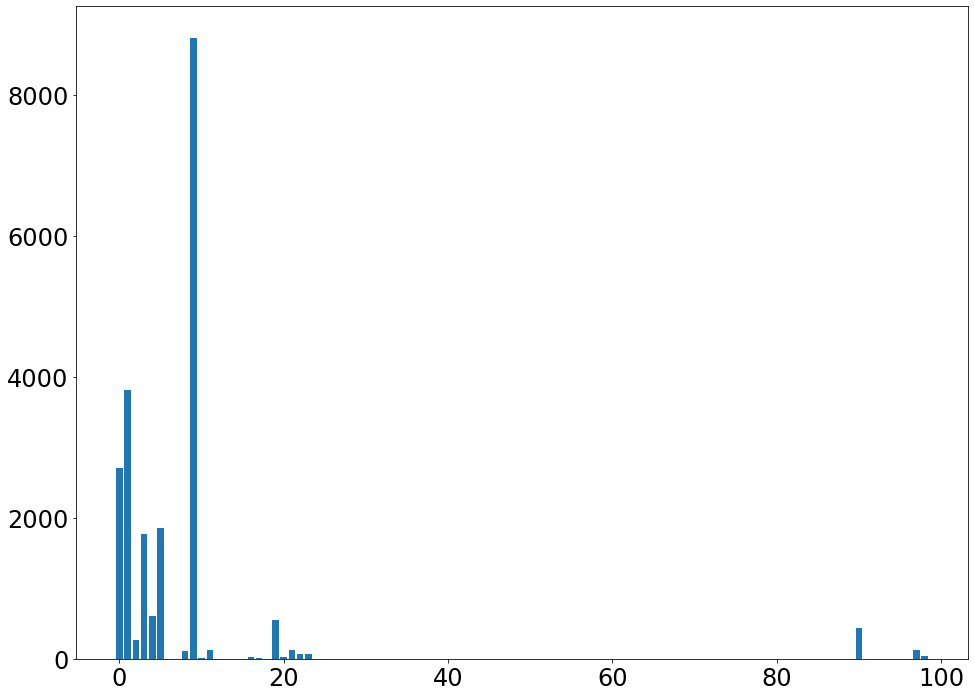

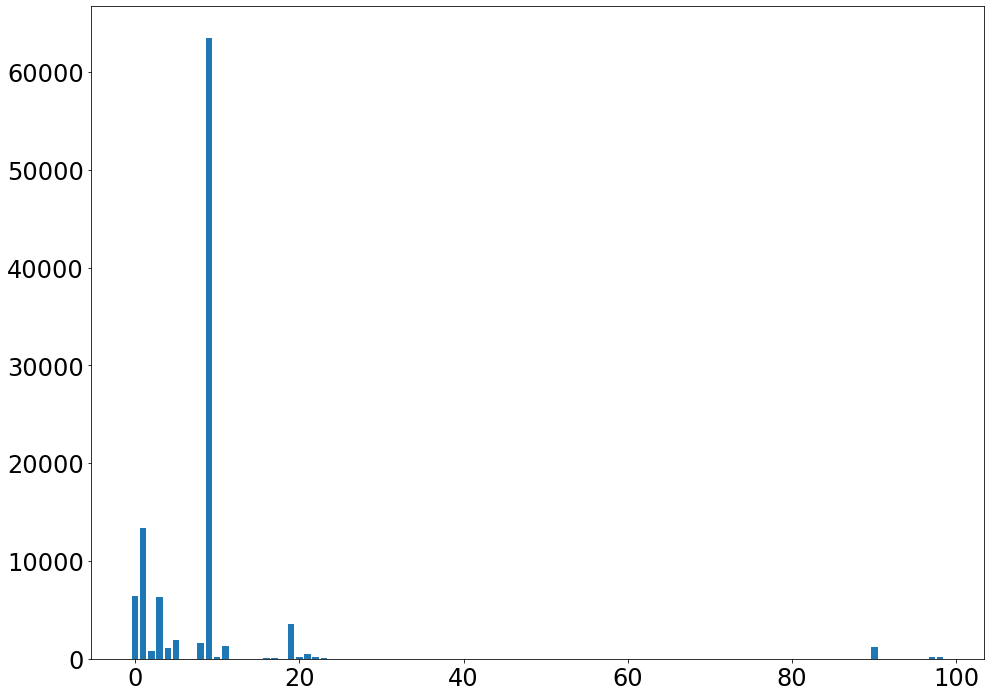

CASUALTY_HOME_AREA_TYPE





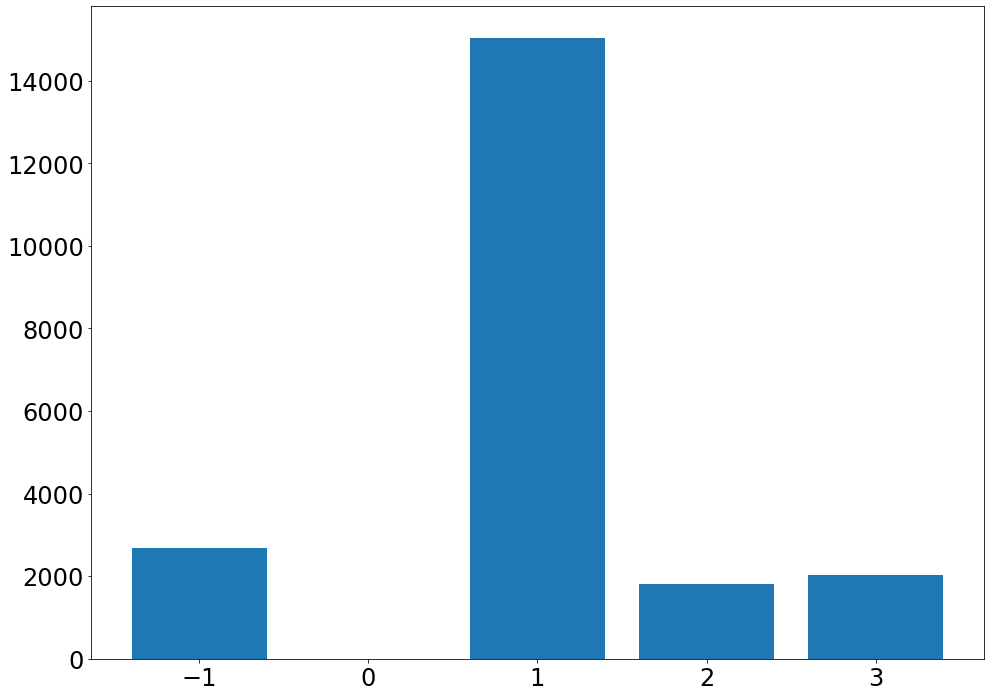

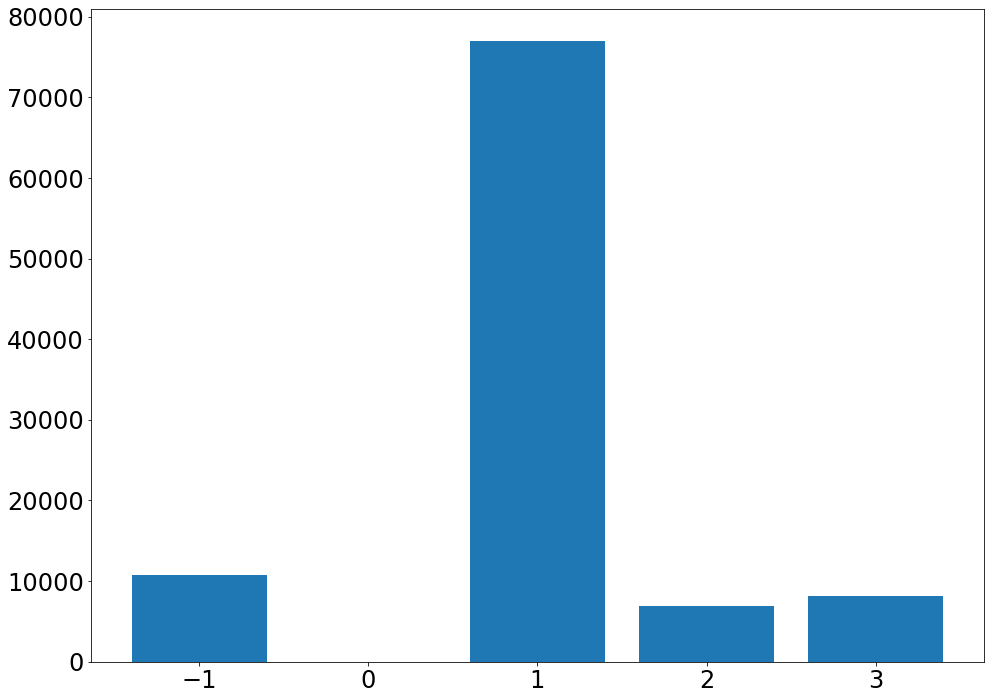

CASUALTY_IMD_DECILE





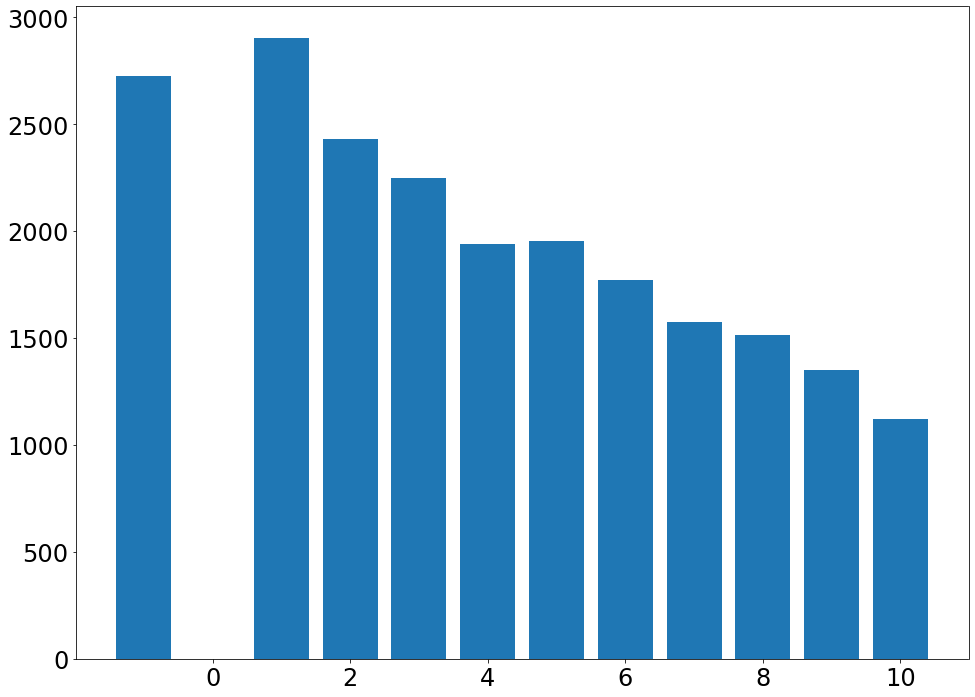

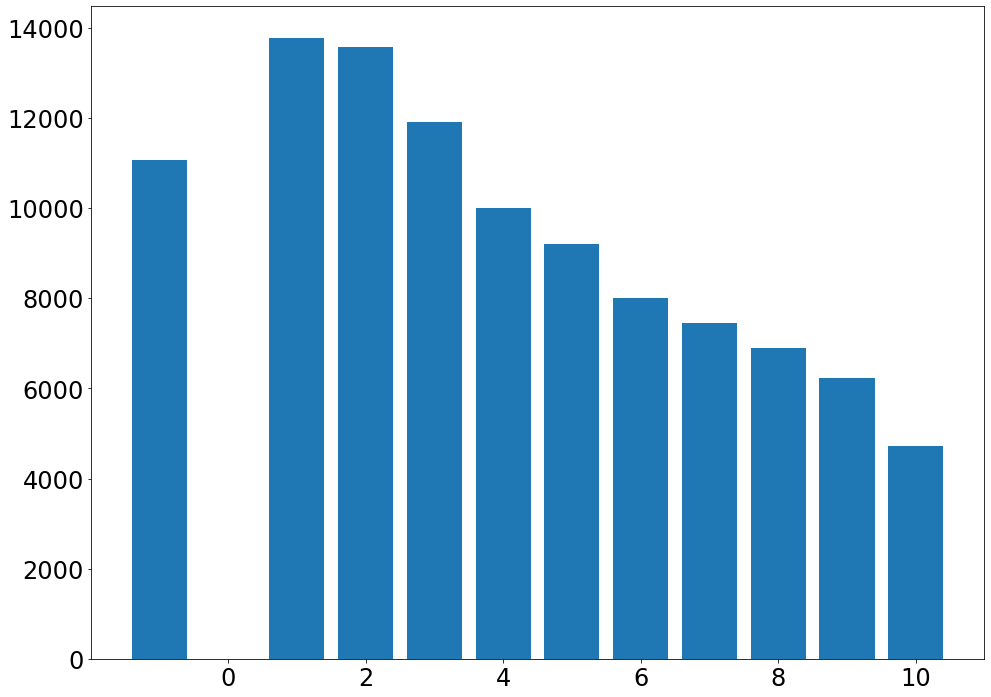

LSOA_OF_CASUALTY
VEHICLE_REFERENCE_Y





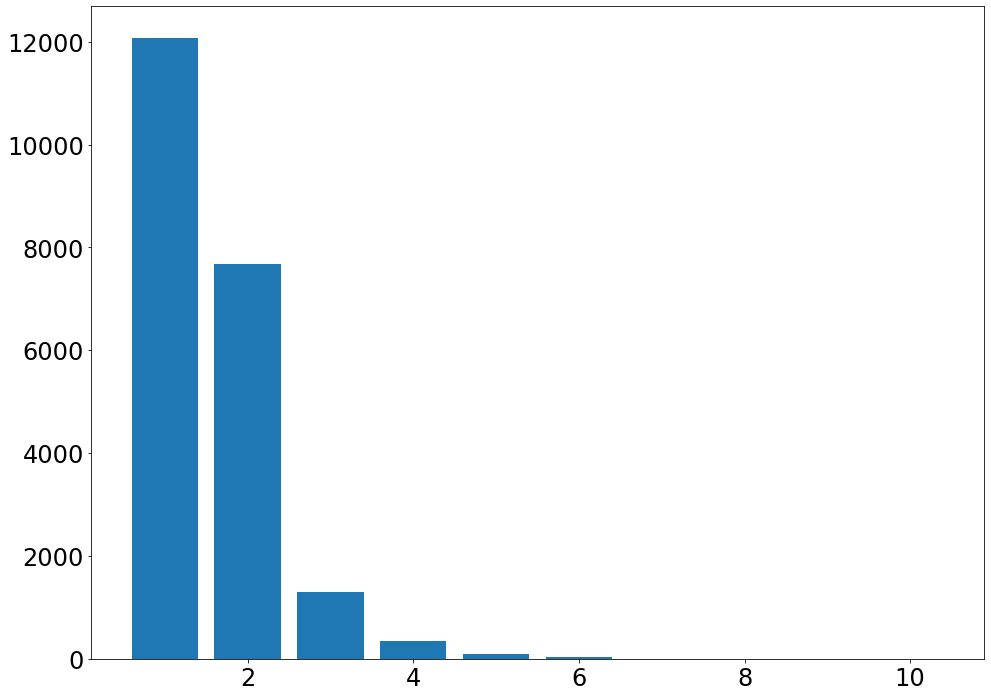

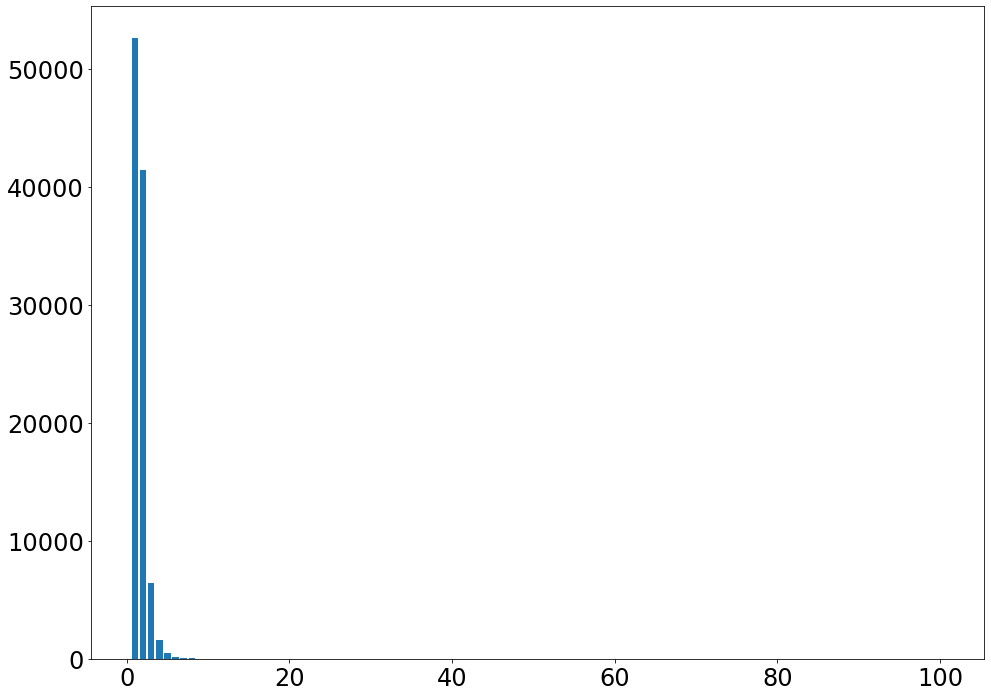

VEHICLE_TYPE





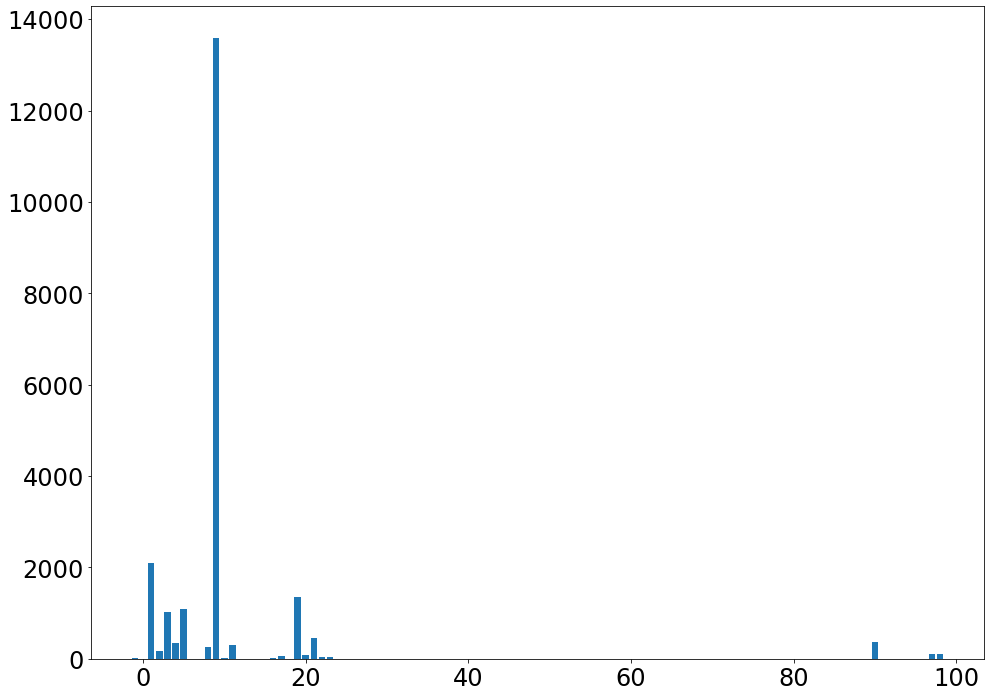

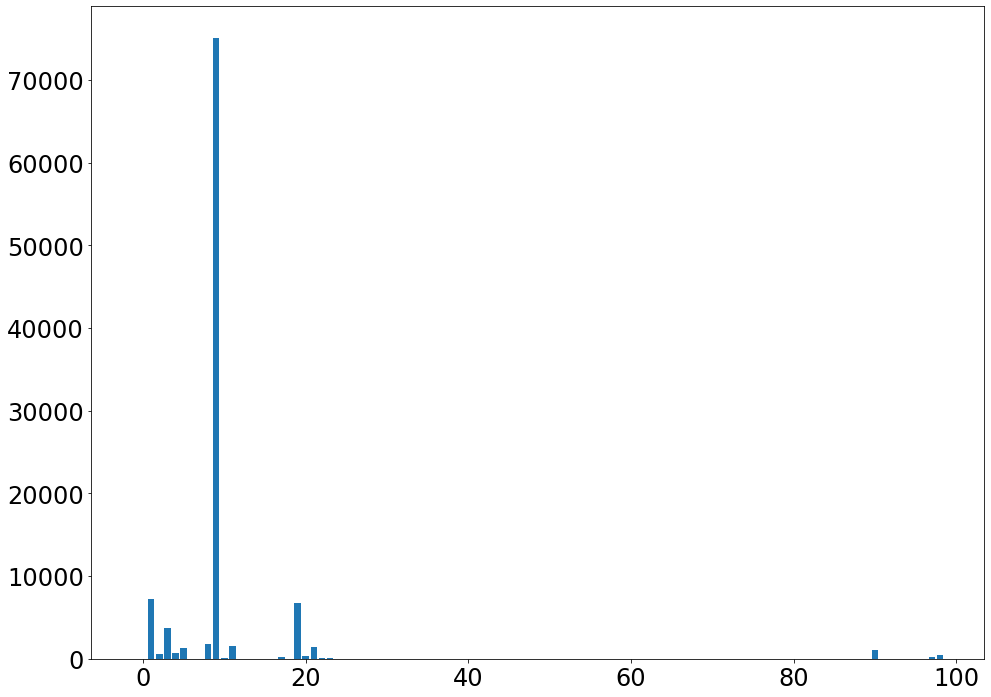

TOWING_AND_ARTICULATION





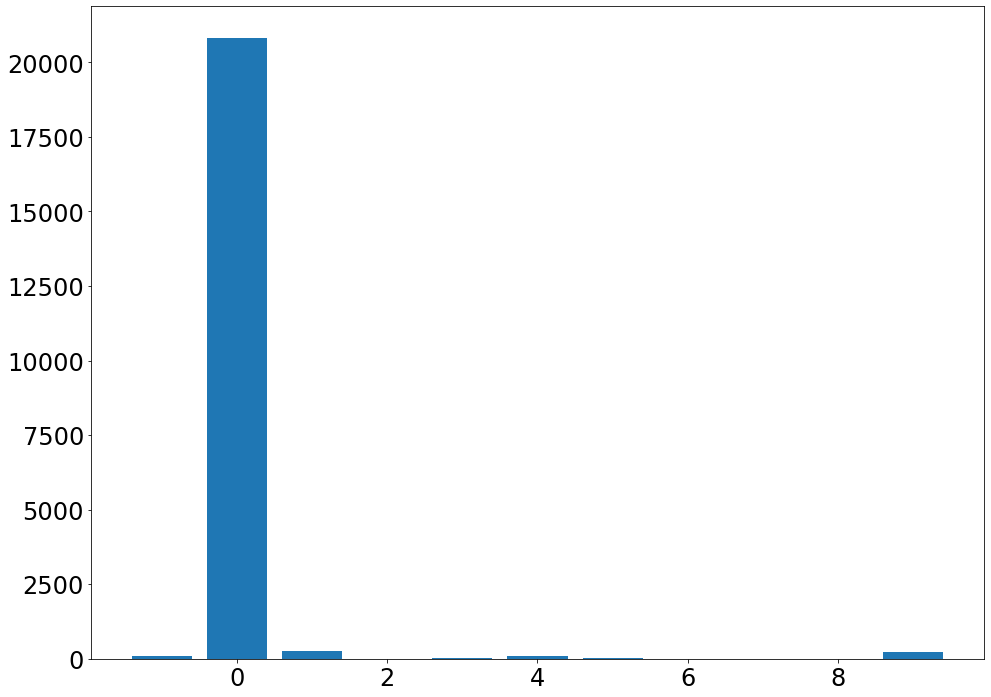

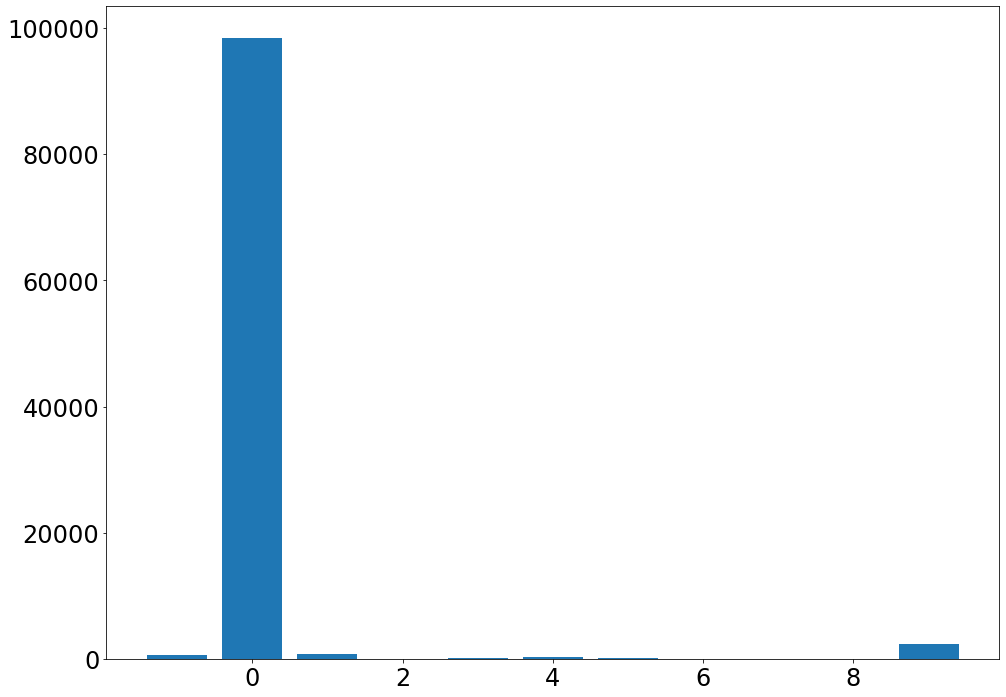

VEHICLE_MANOEUVRE





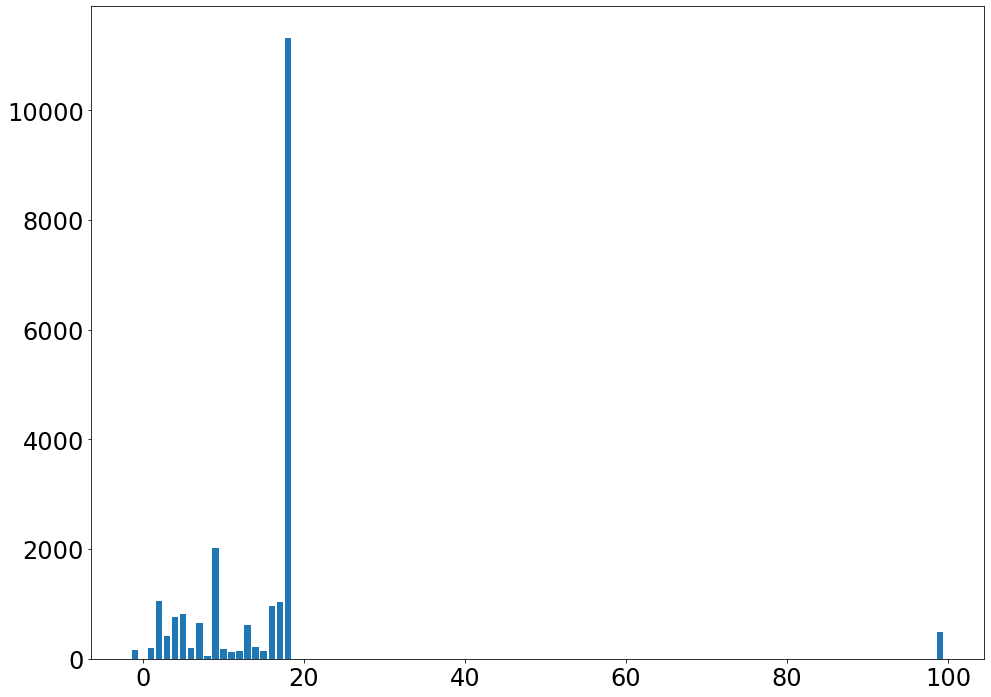

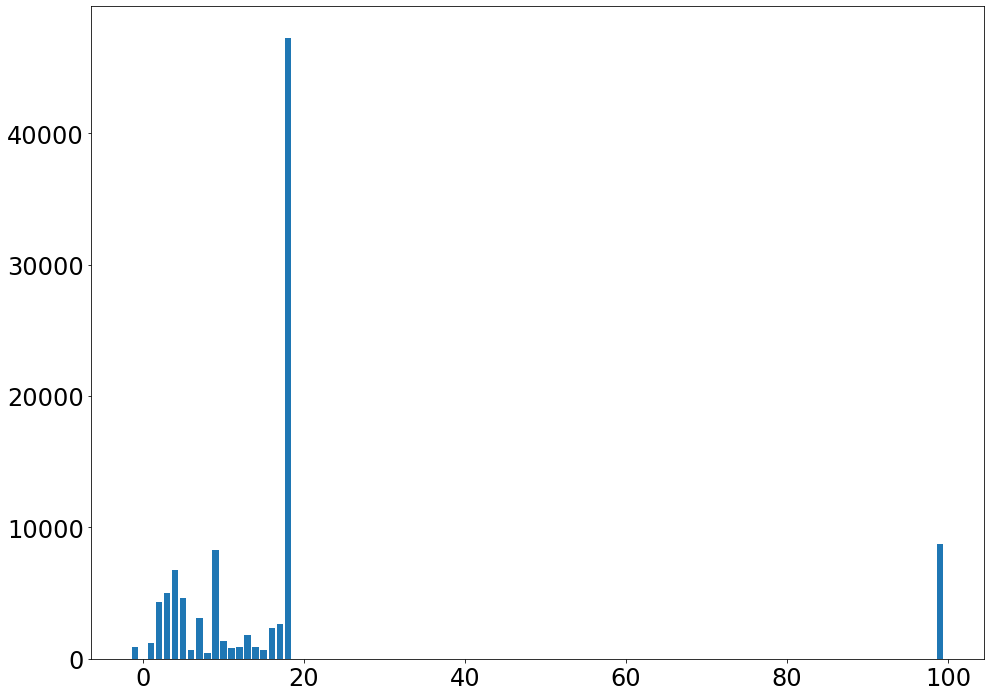

VEHICLE_DIRECTION_FROM





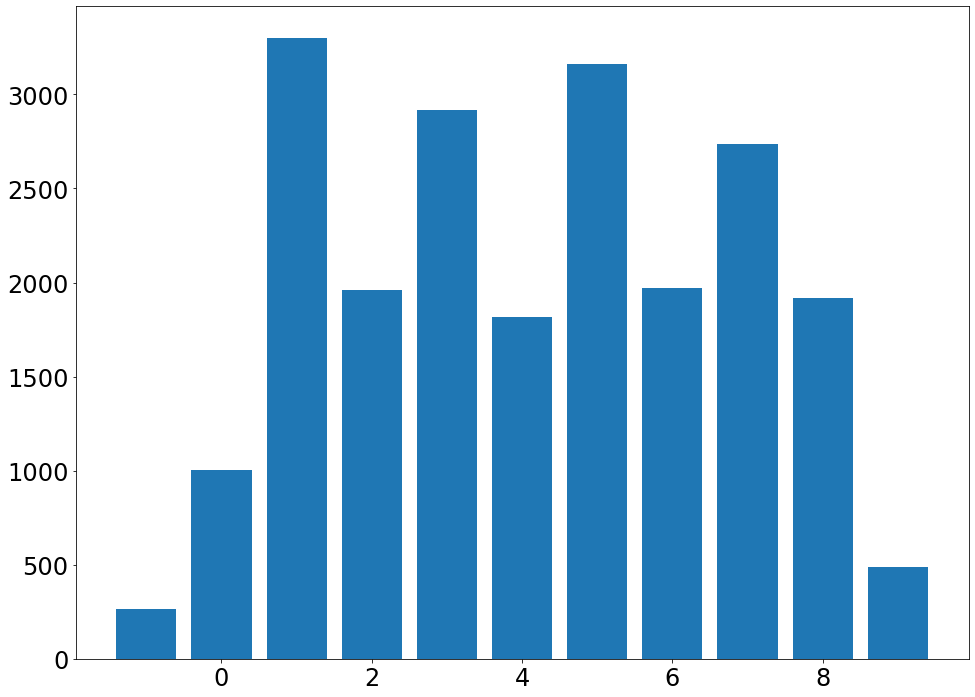

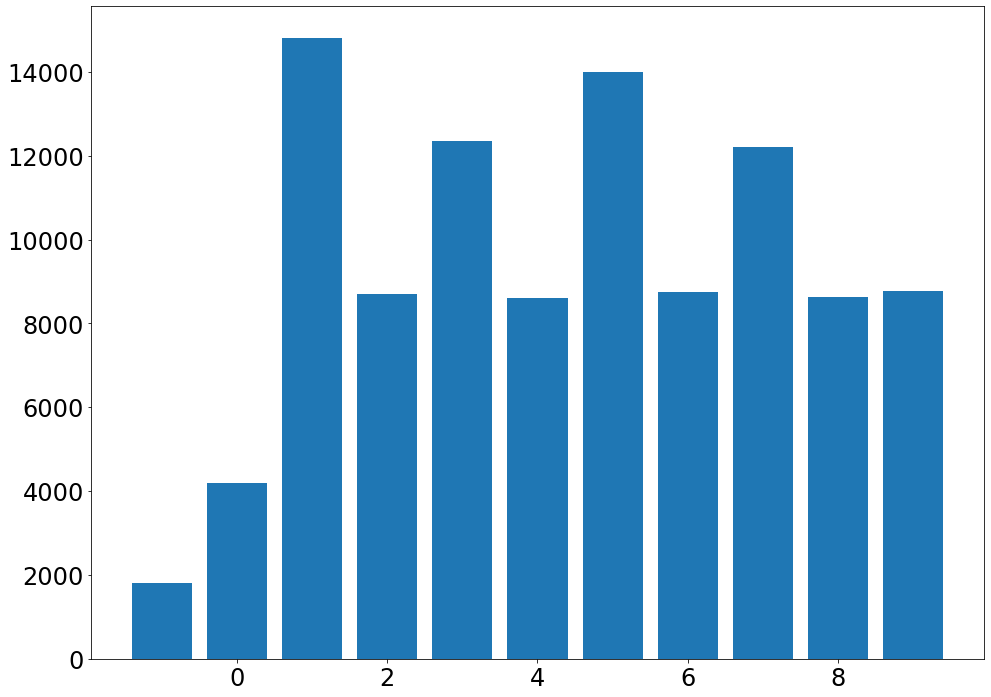

VEHICLE_DIRECTION_TO





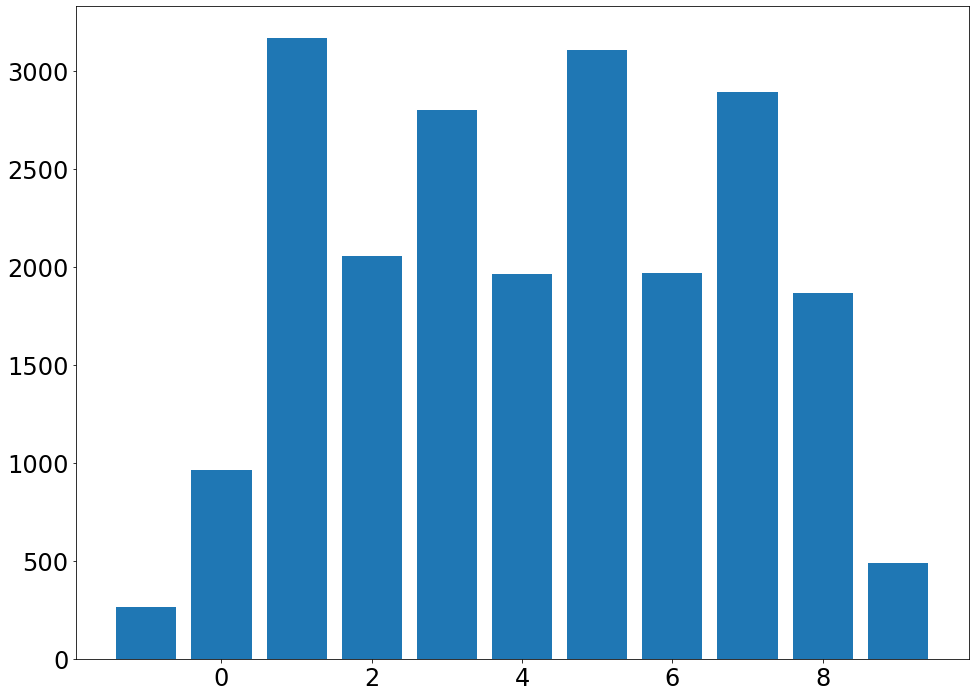

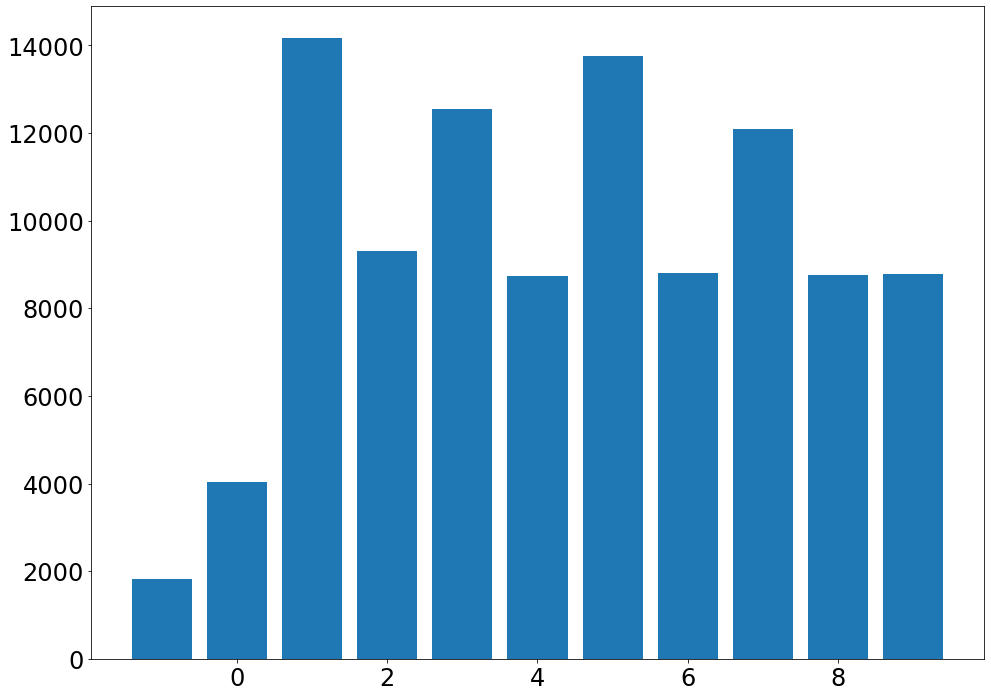

VEHICLE_LOCATION_RESTRICTED_LANE





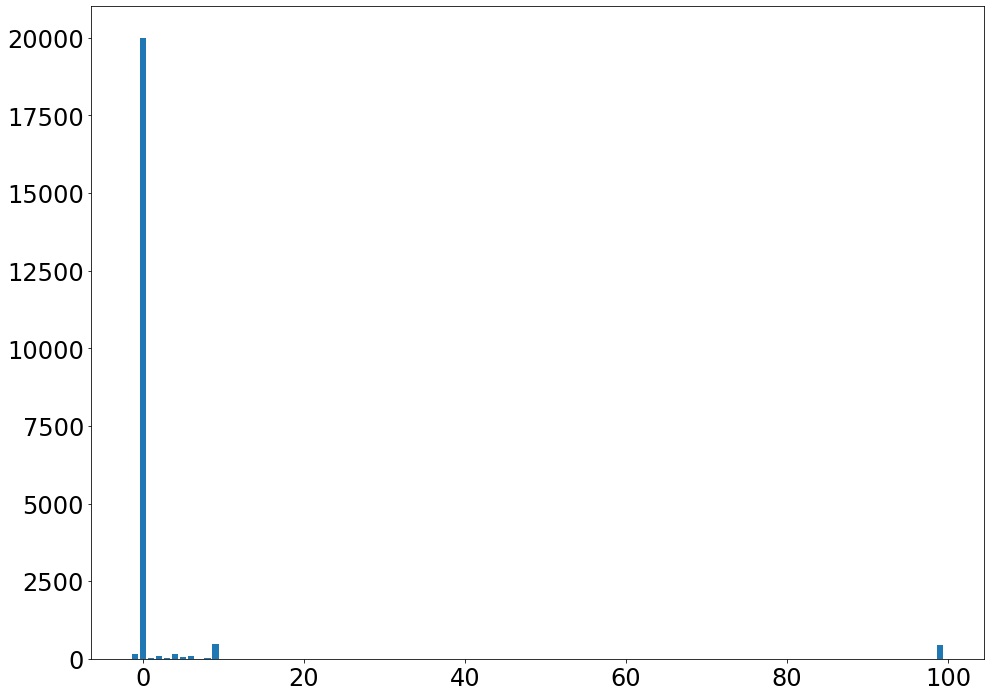

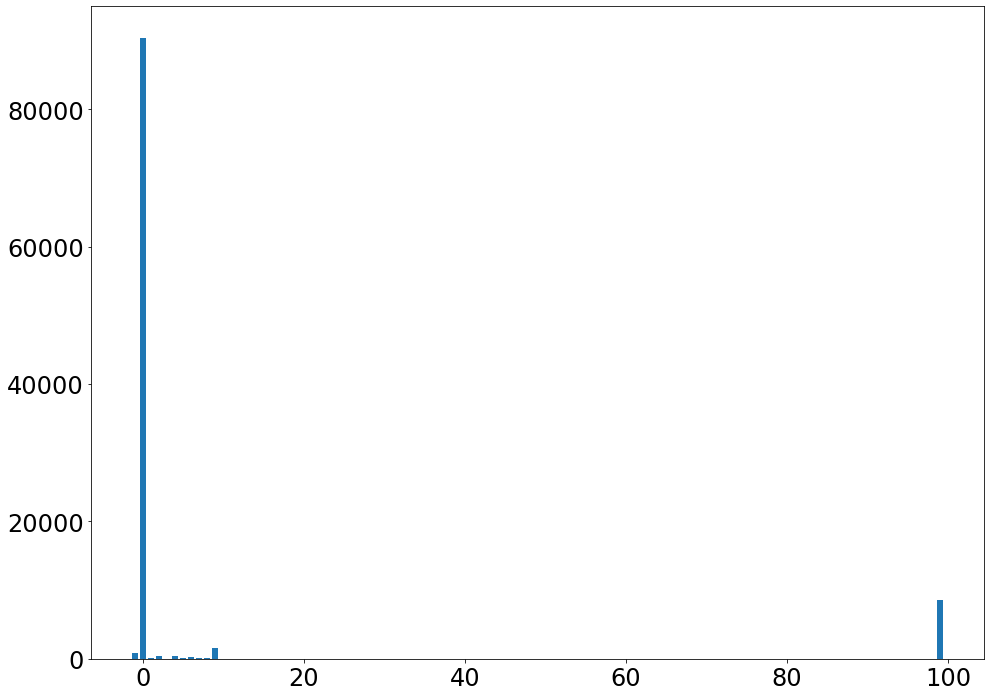

JUNCTION_LOCATION





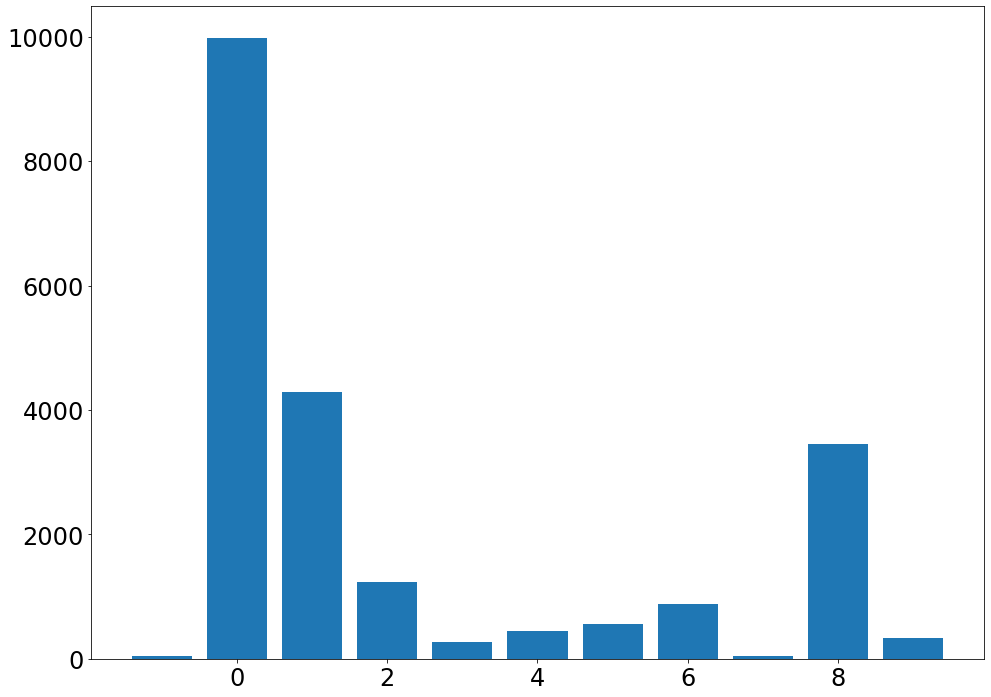

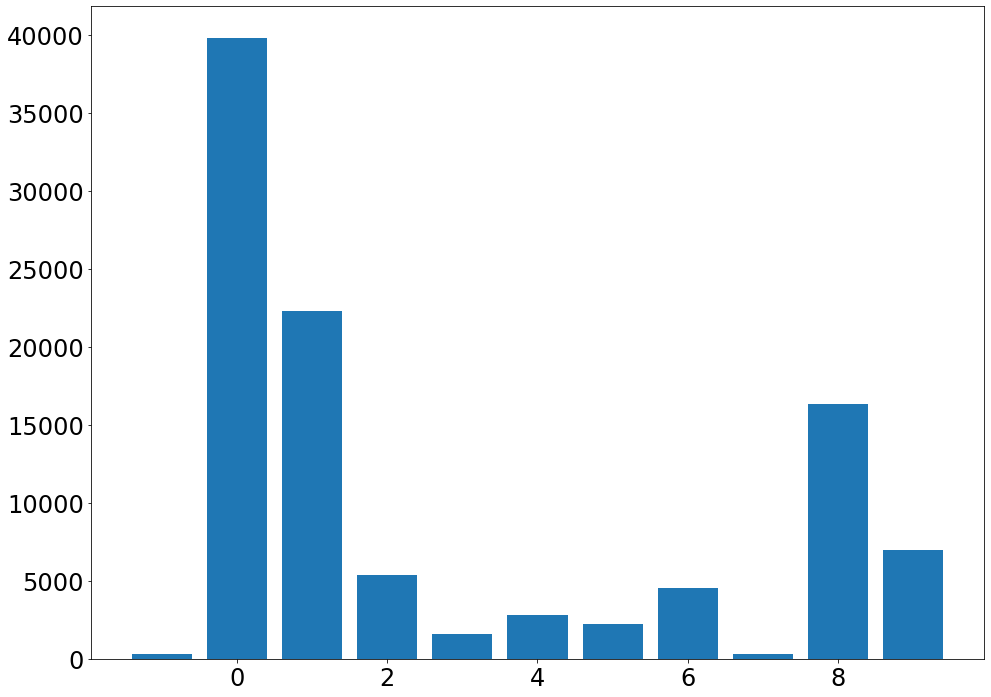

SKIDDING_AND_OVERTURNING





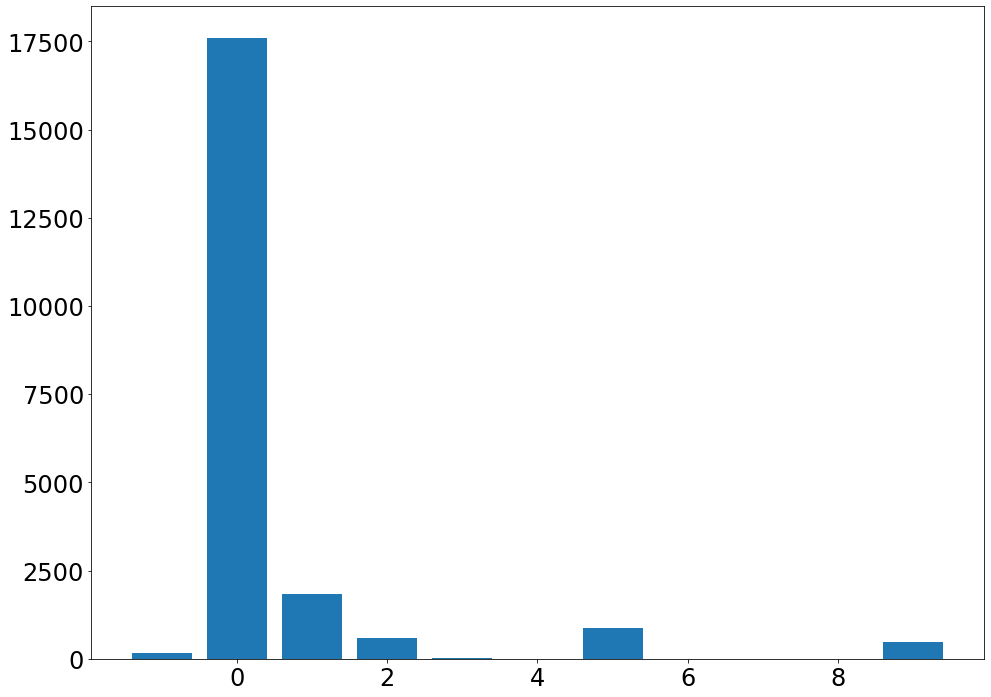

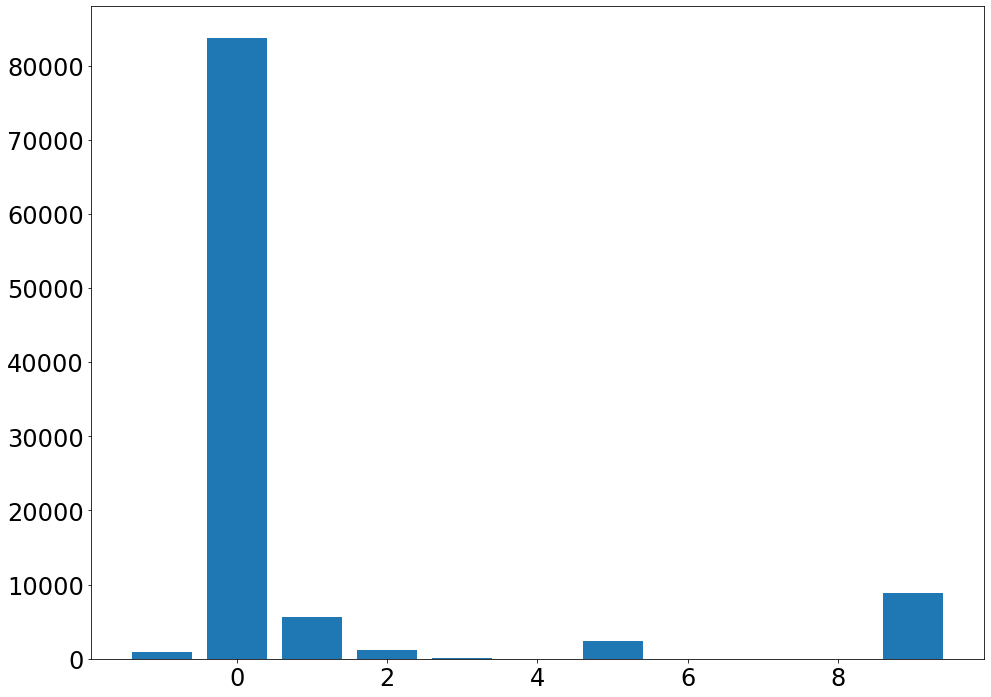

HIT_OBJECT_IN_CARRIAGEWAY





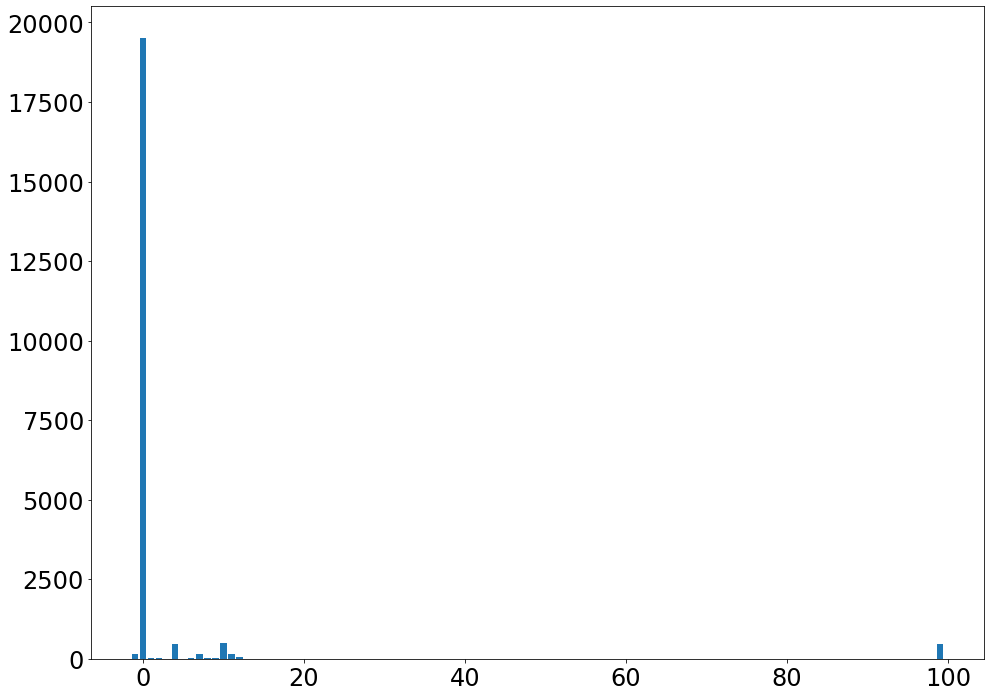

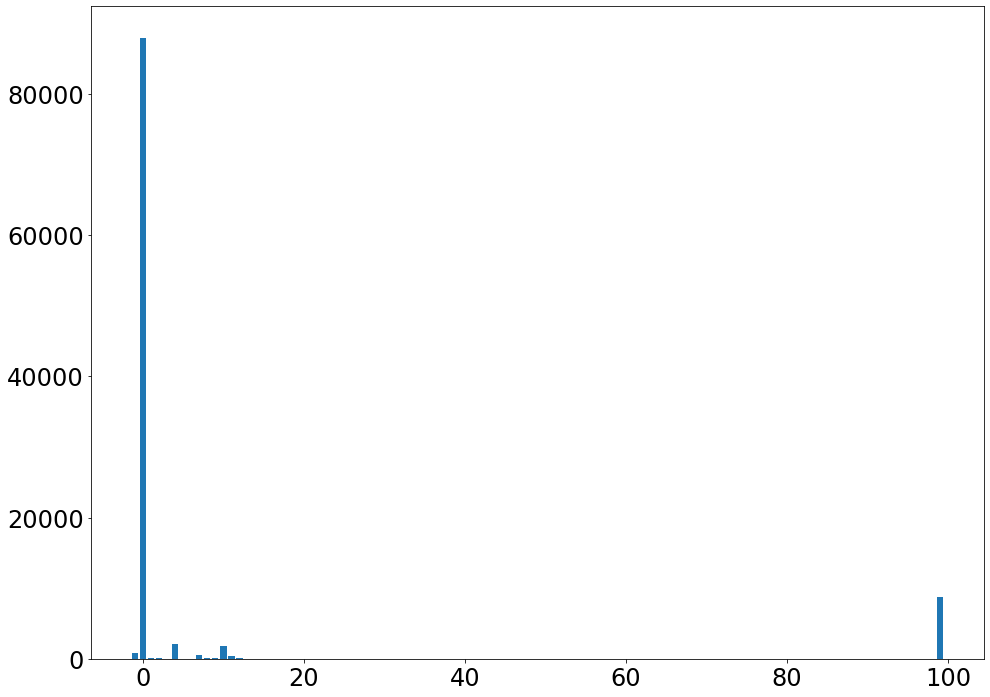

VEHICLE_LEAVING_CARRIAGEWAY





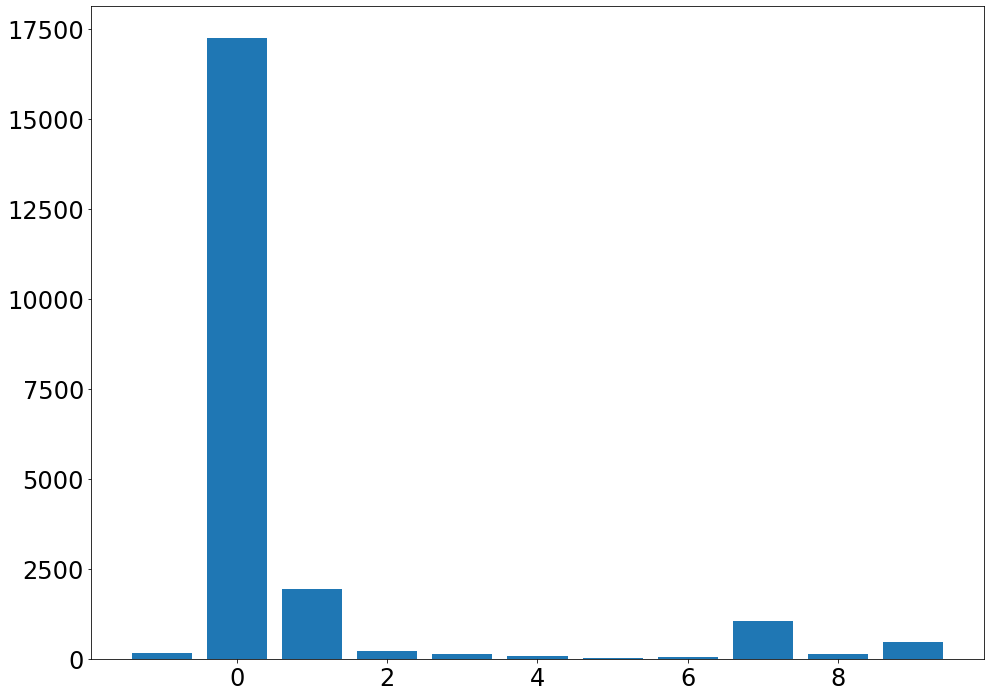

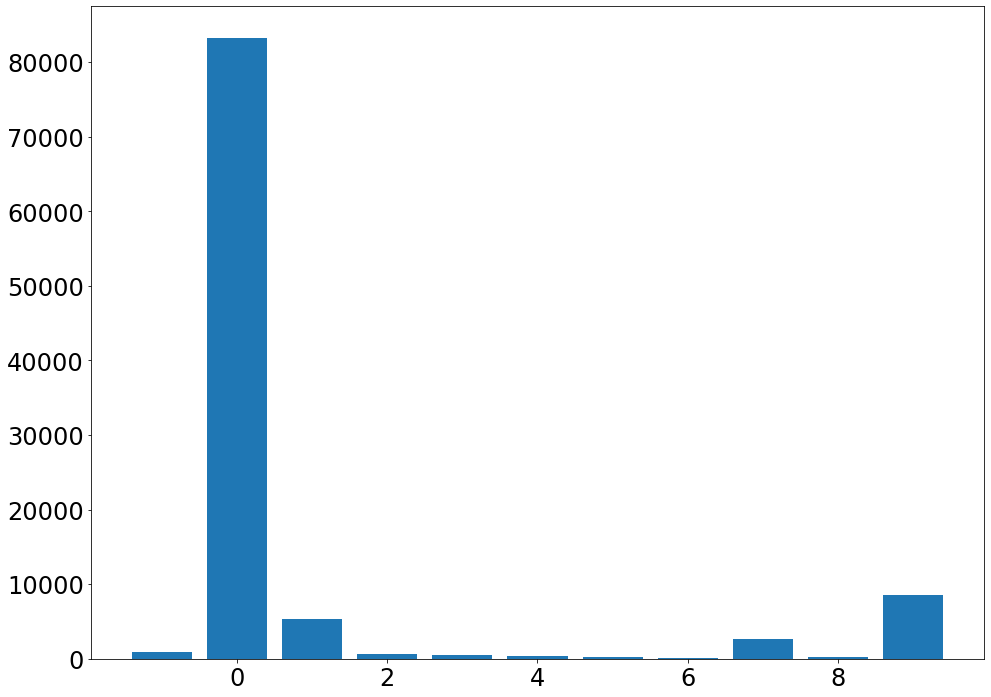

HIT_OBJECT_OFF_CARRIAGEWAY





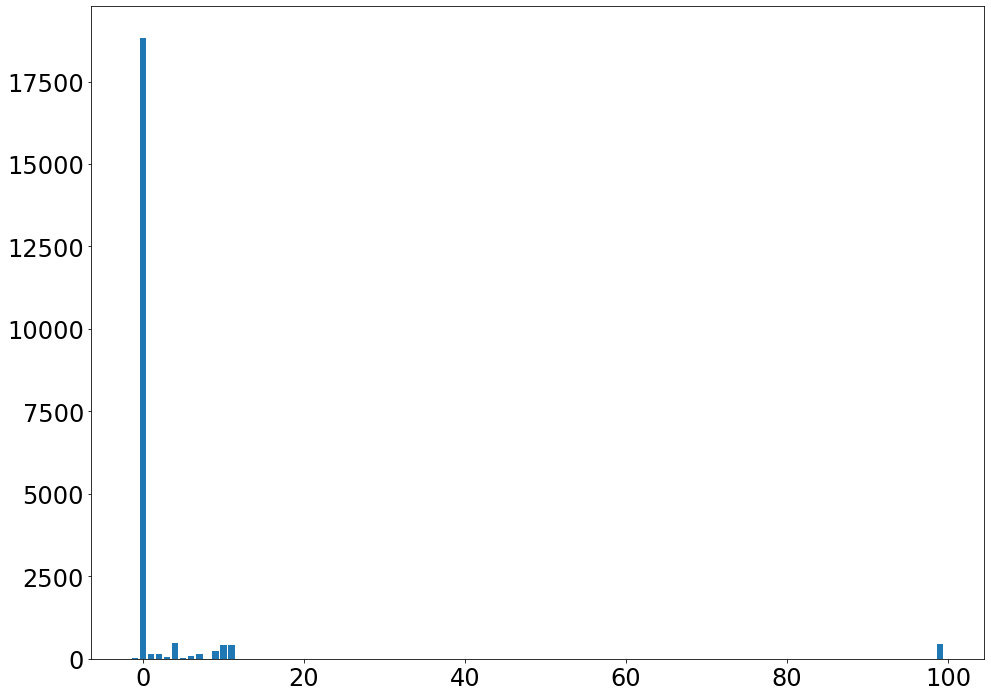

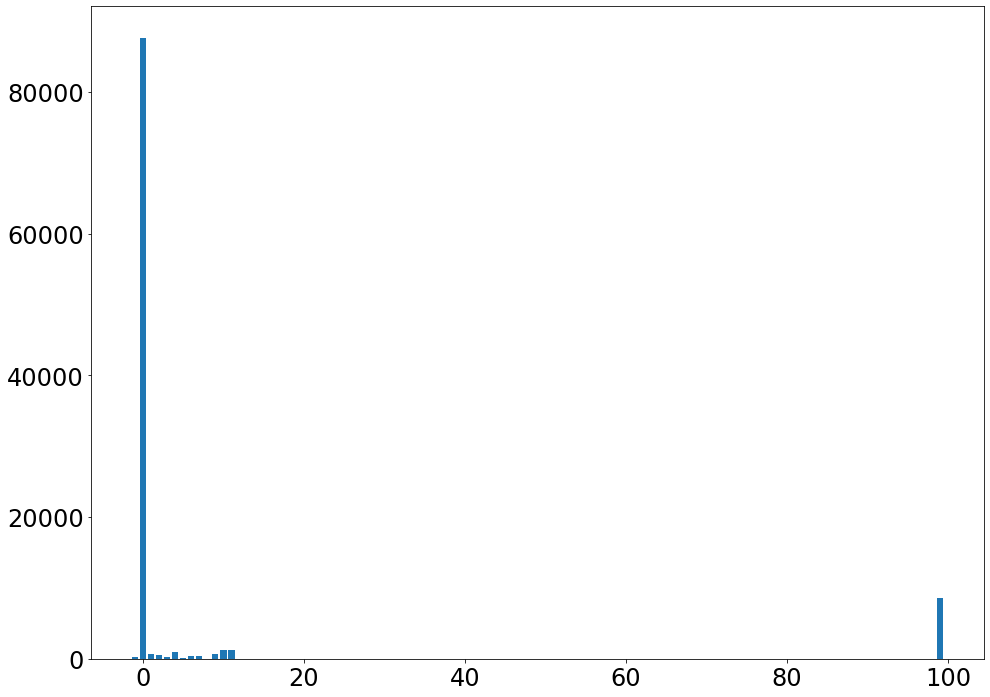

FIRST_POINT_OF_IMPACT





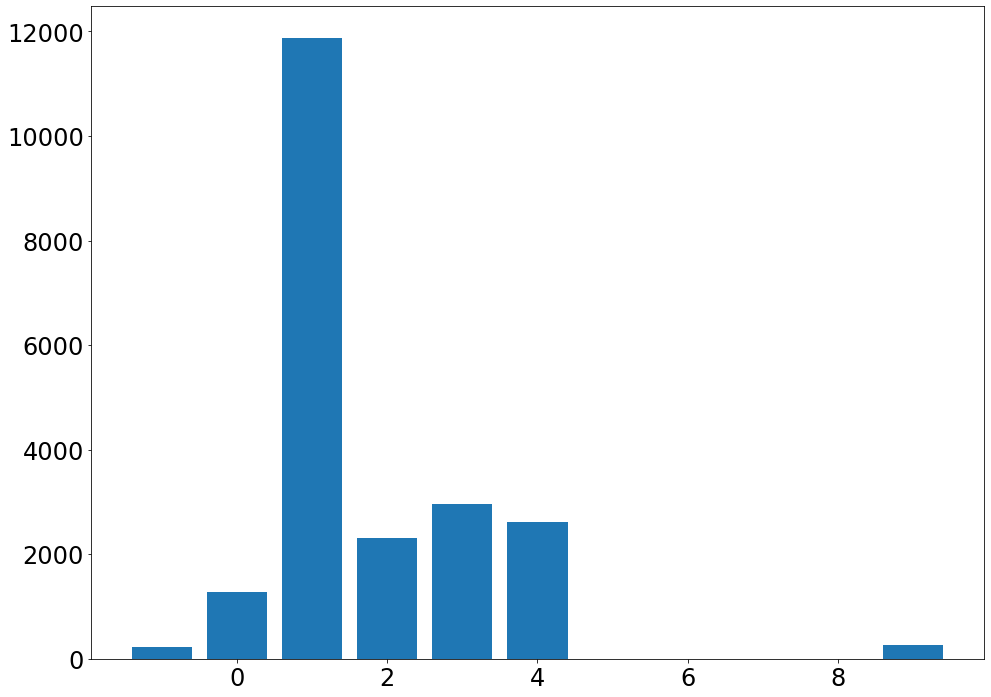

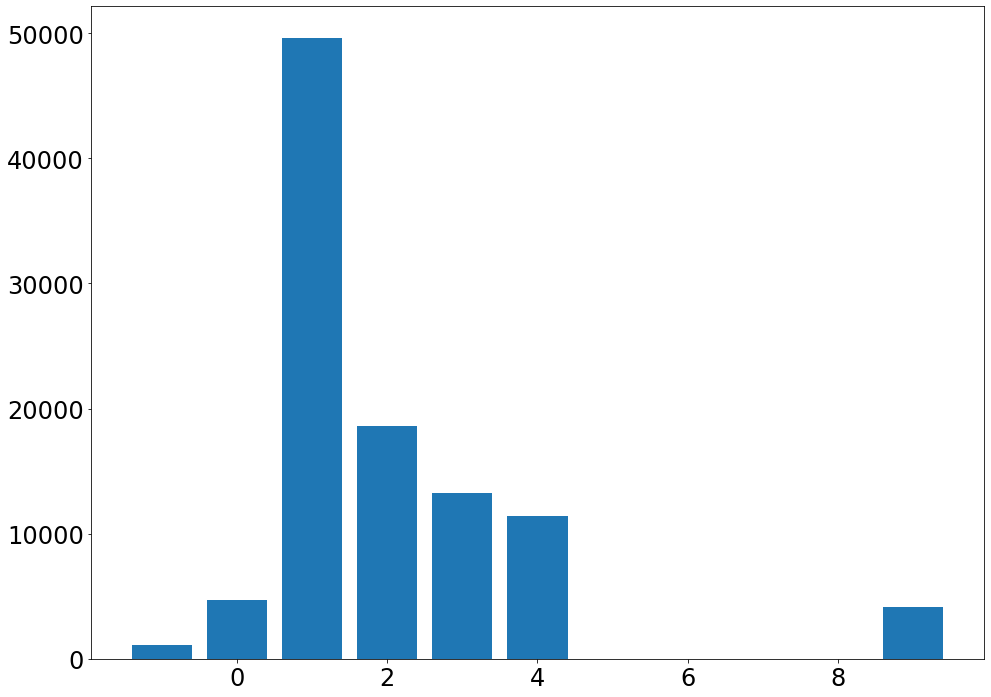

VEHICLE_LEFT_HAND_DRIVE





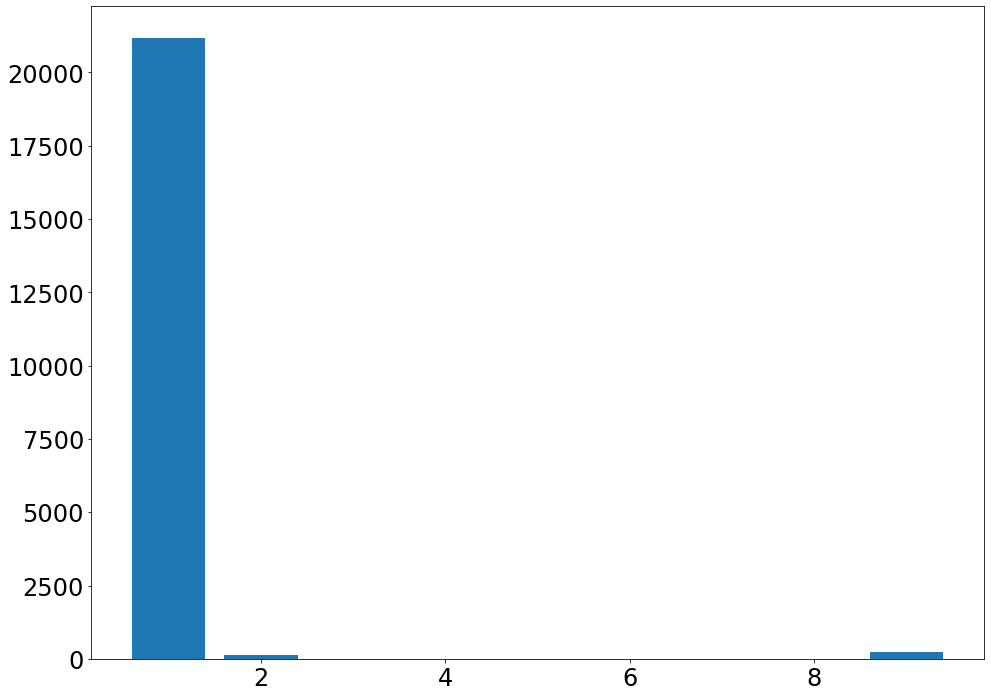

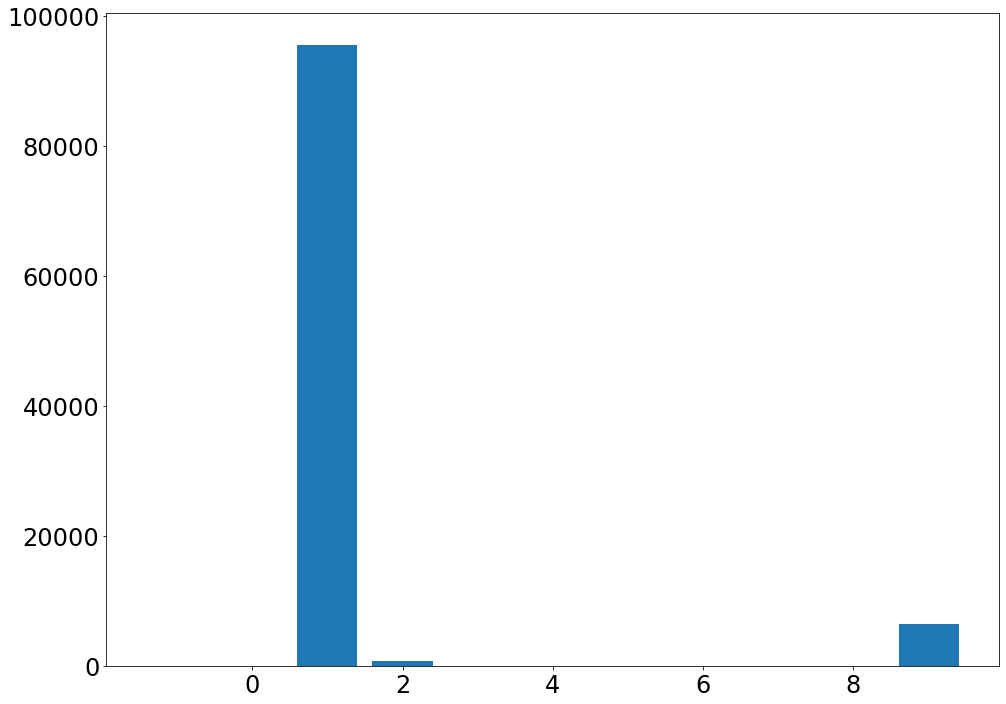

JOURNEY_PURPOSE_OF_DRIVER





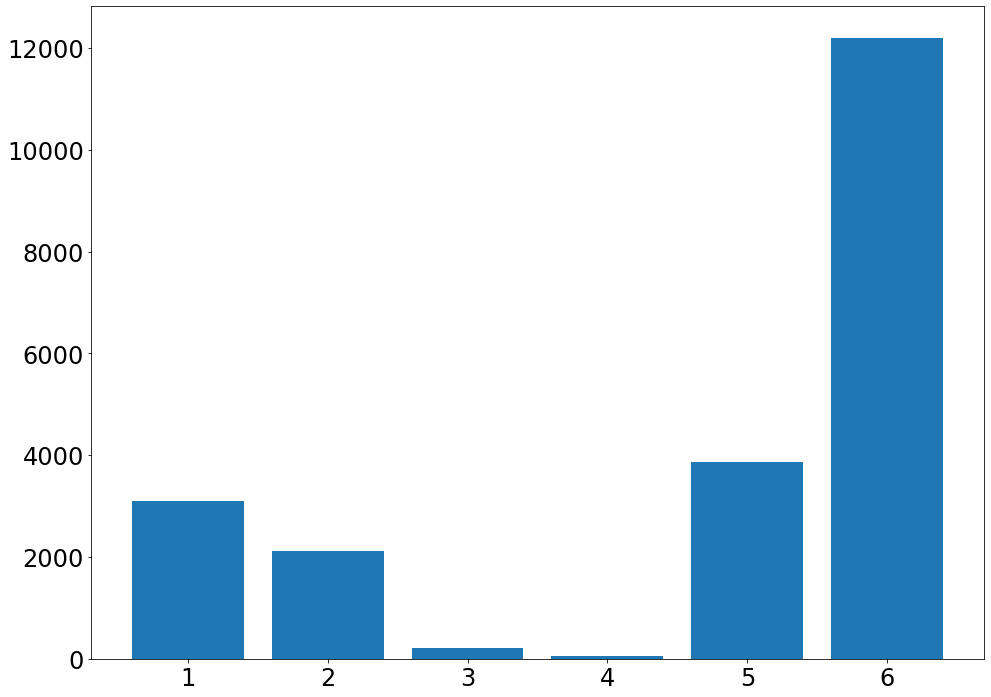

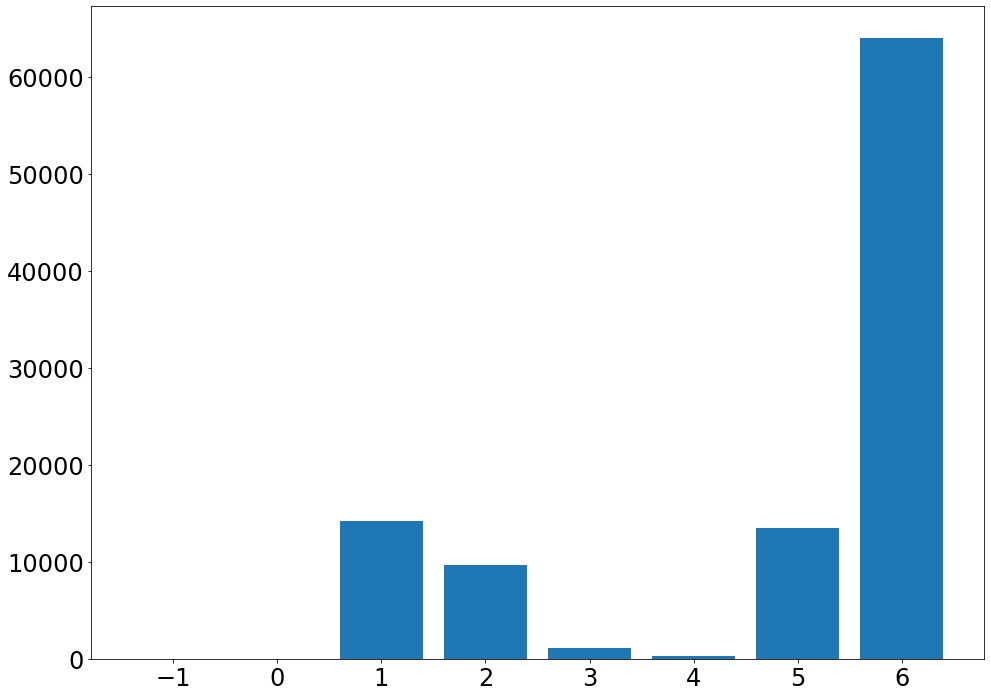

SEX_OF_DRIVER





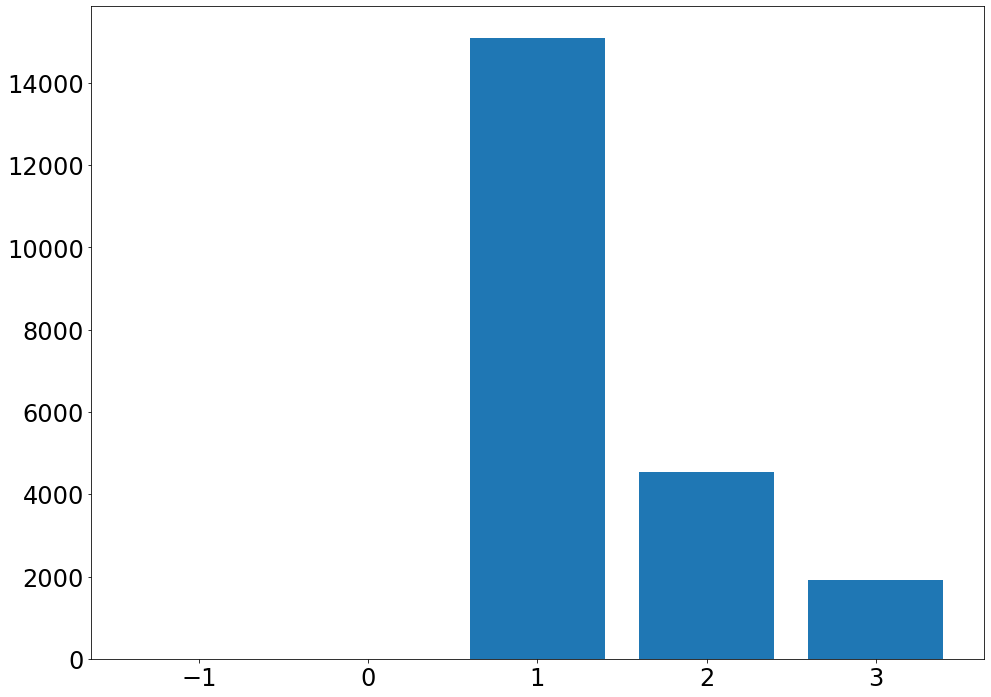

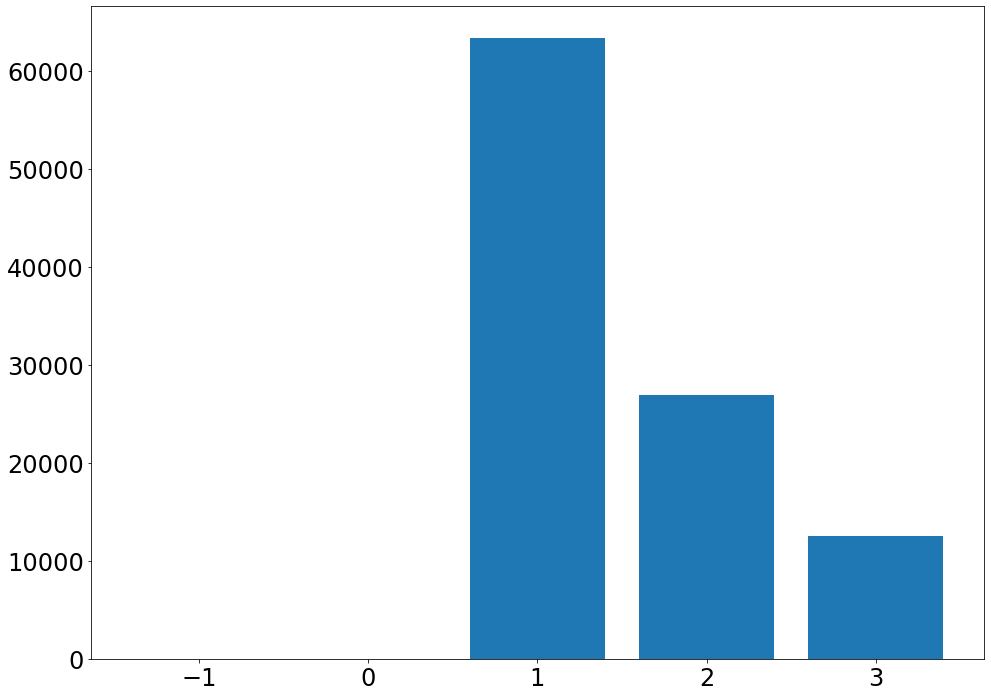

AGE_OF_DRIVER





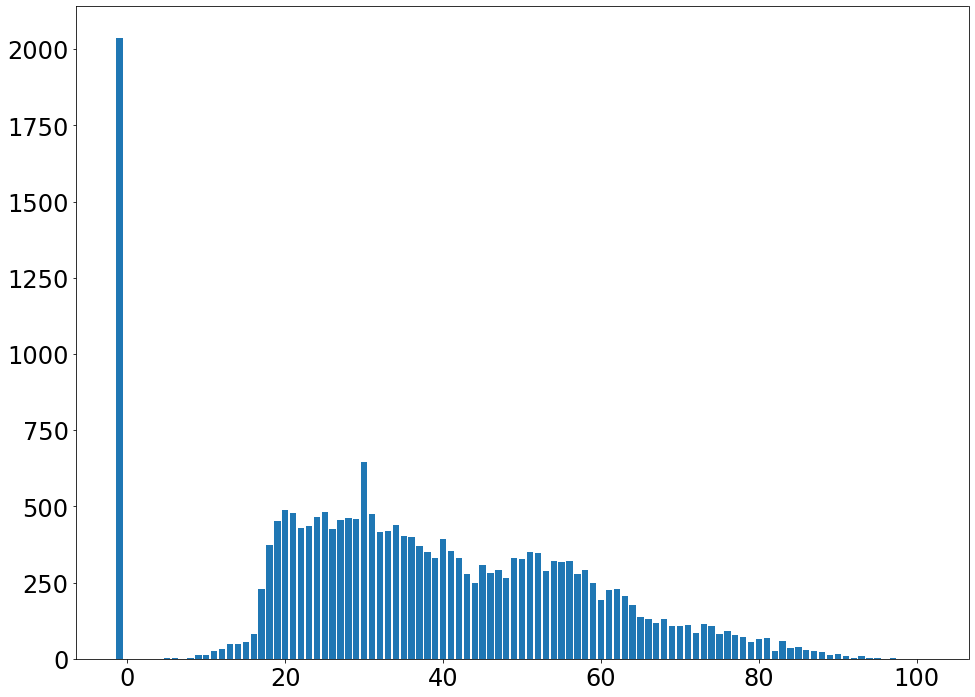

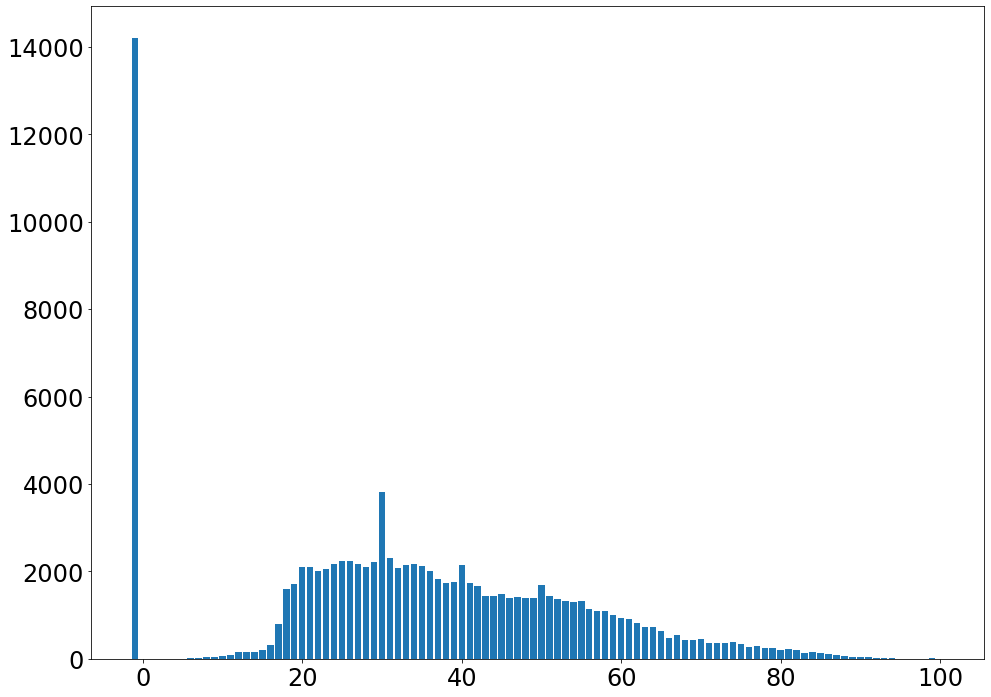

AGE_BAND_OF_DRIVER





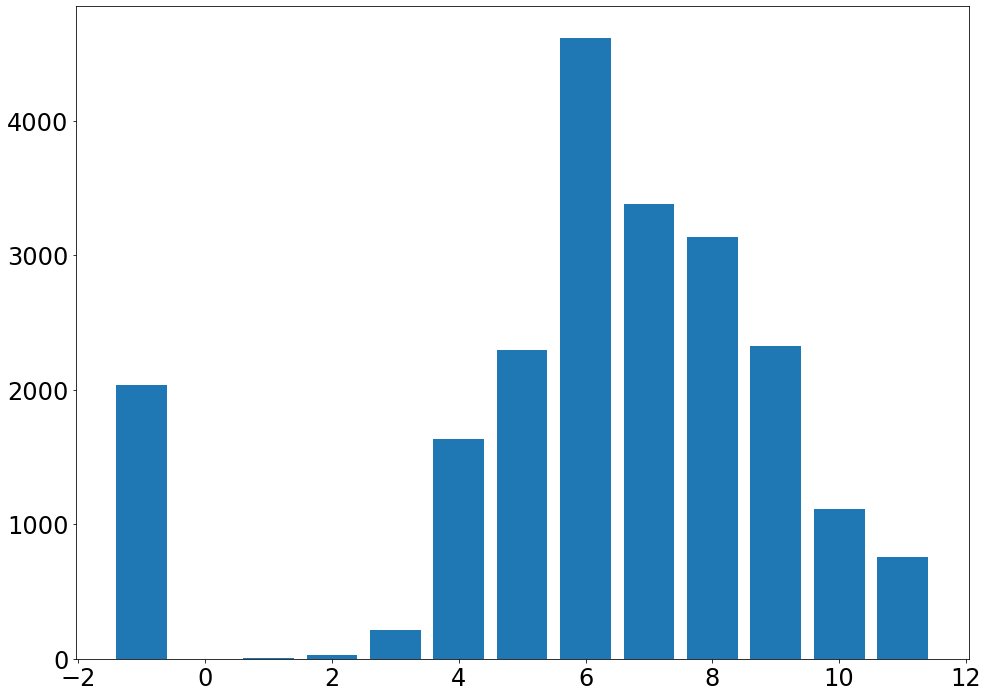

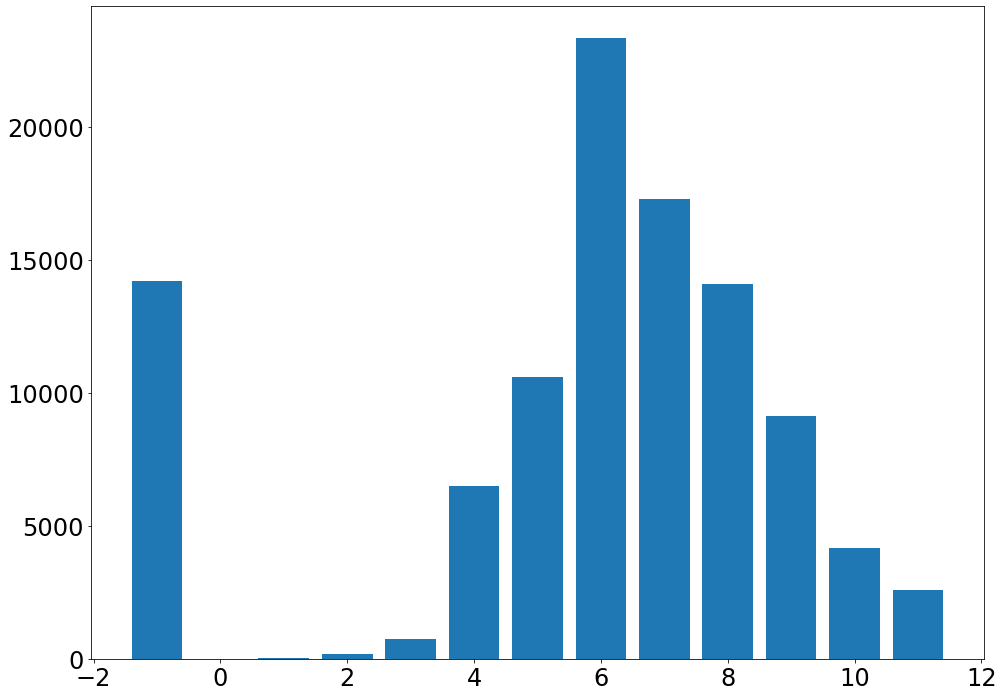

ENGINE_CAPACITY_CC





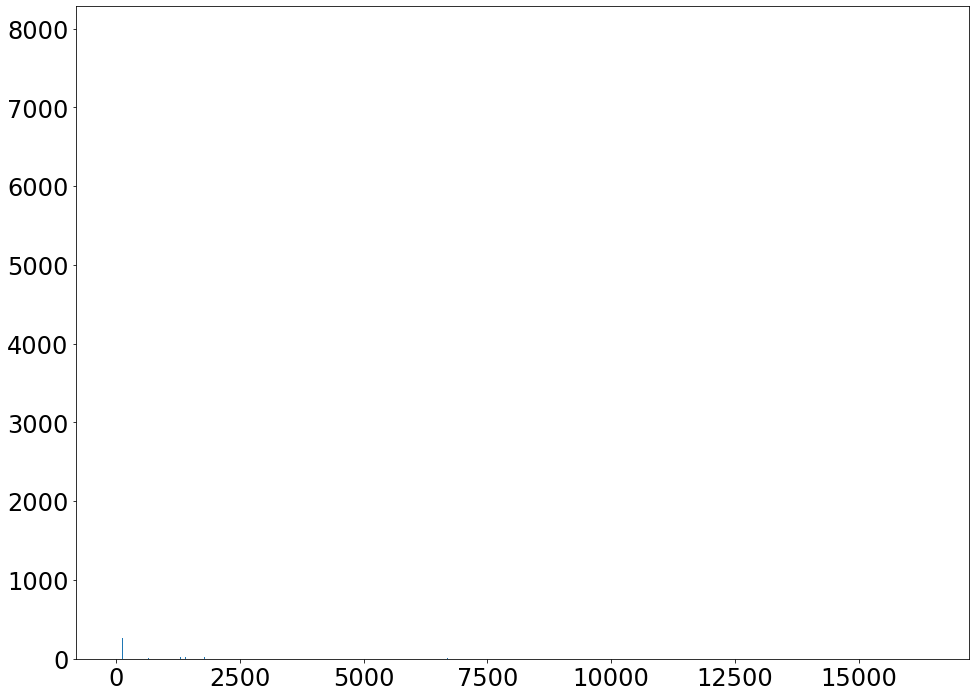

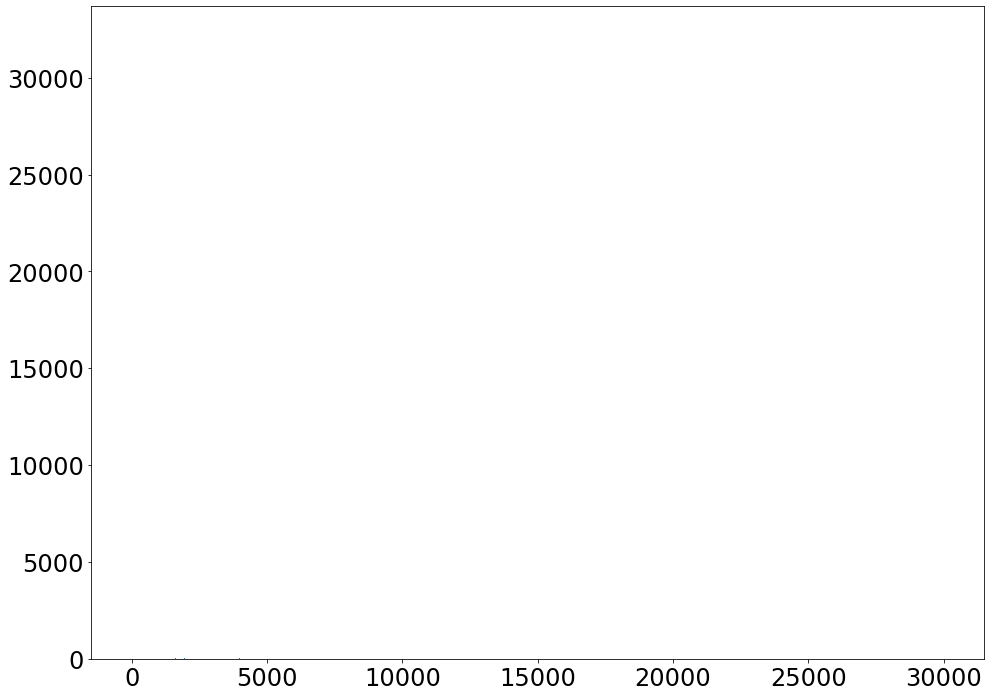

PROPULSION_CODE





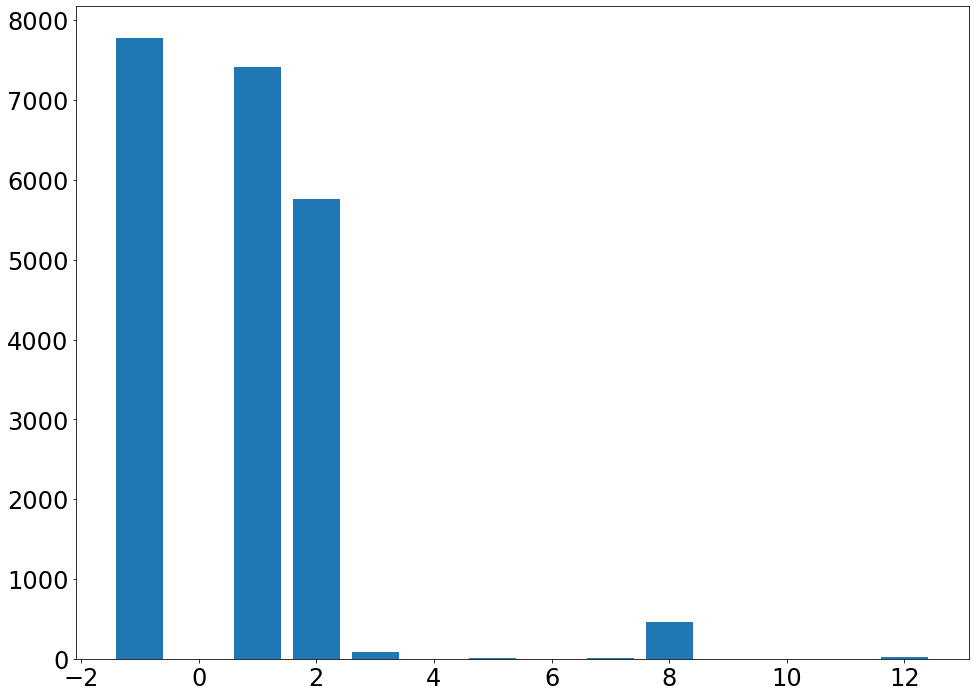

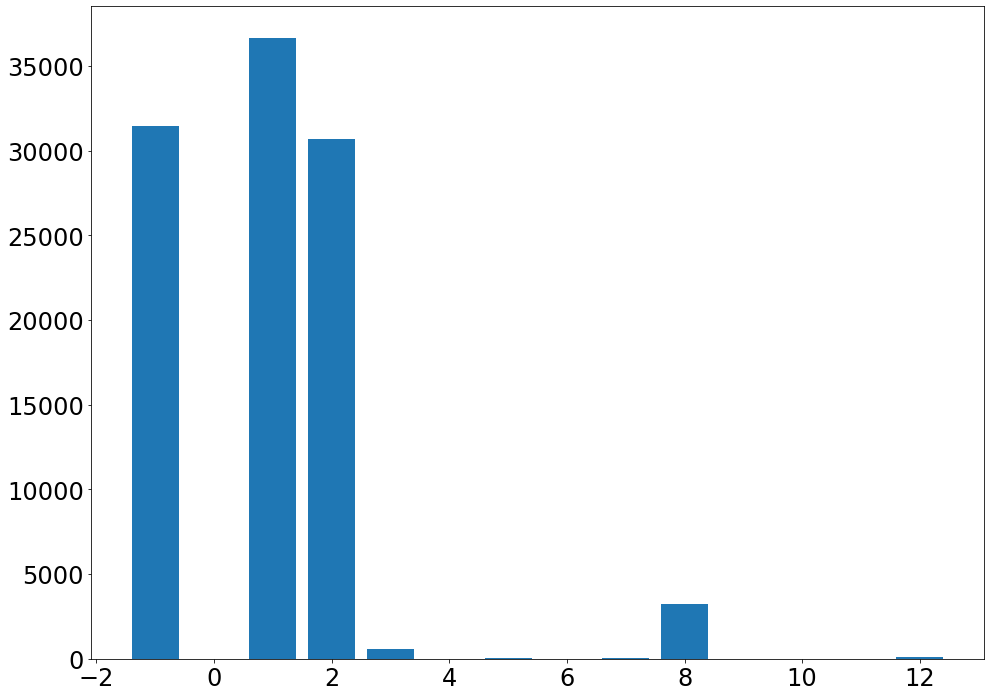

AGE_OF_VEHICLE





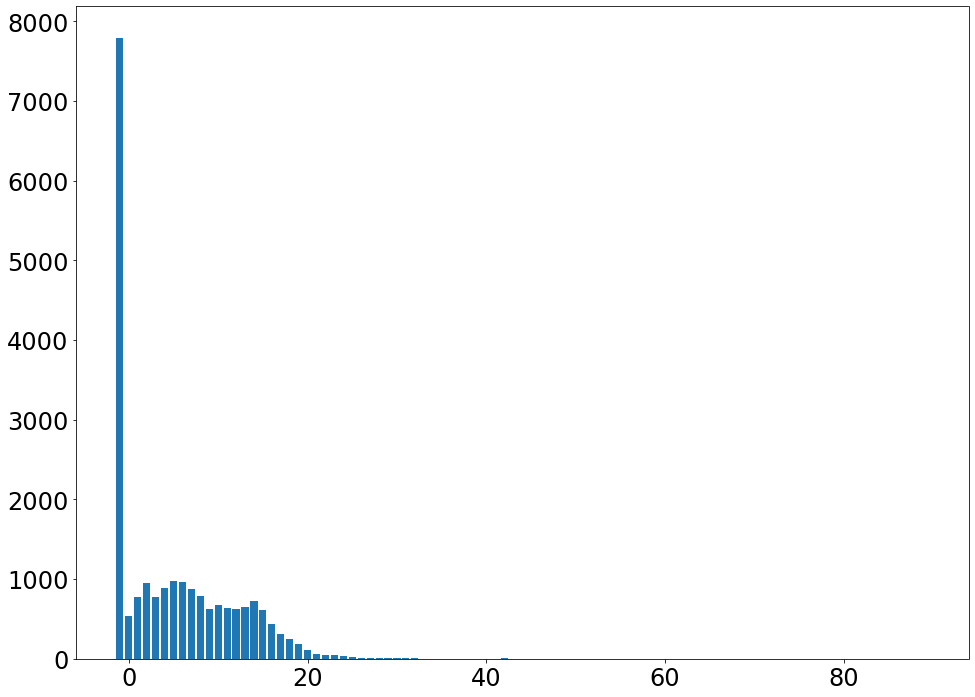

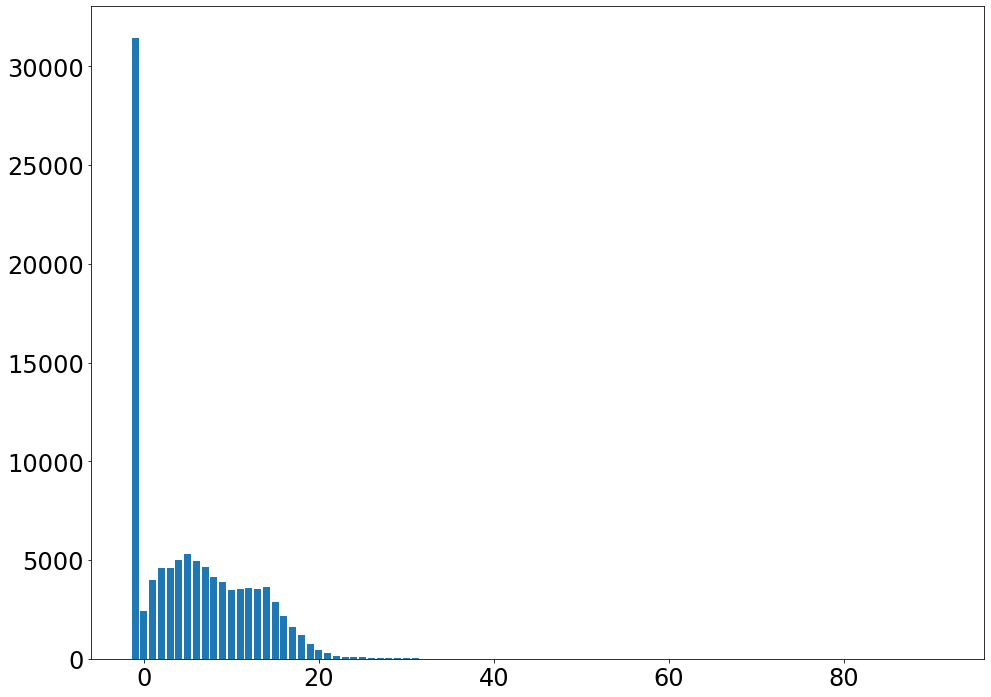

GENERIC_MAKE_MODEL
DRIVER_IMD_DECILE





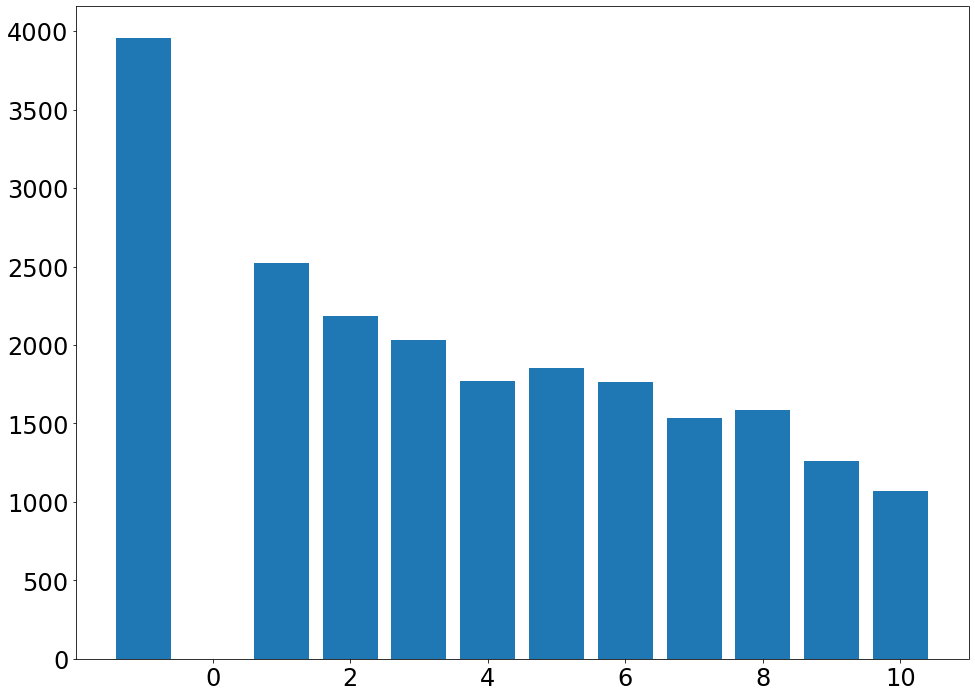

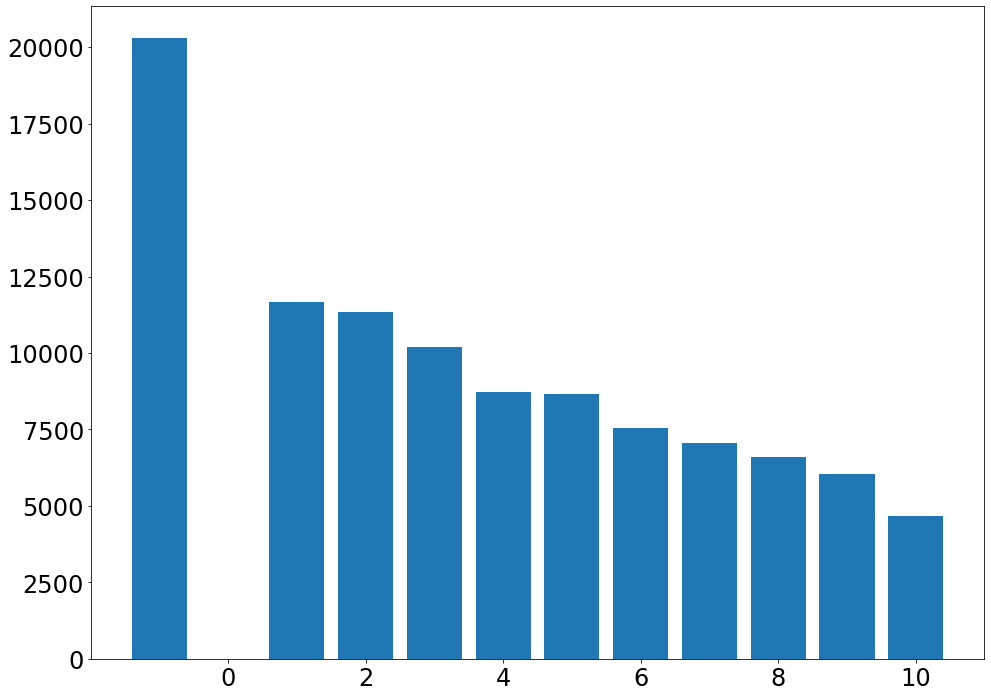

DRIVER_HOME_AREA_TYPE





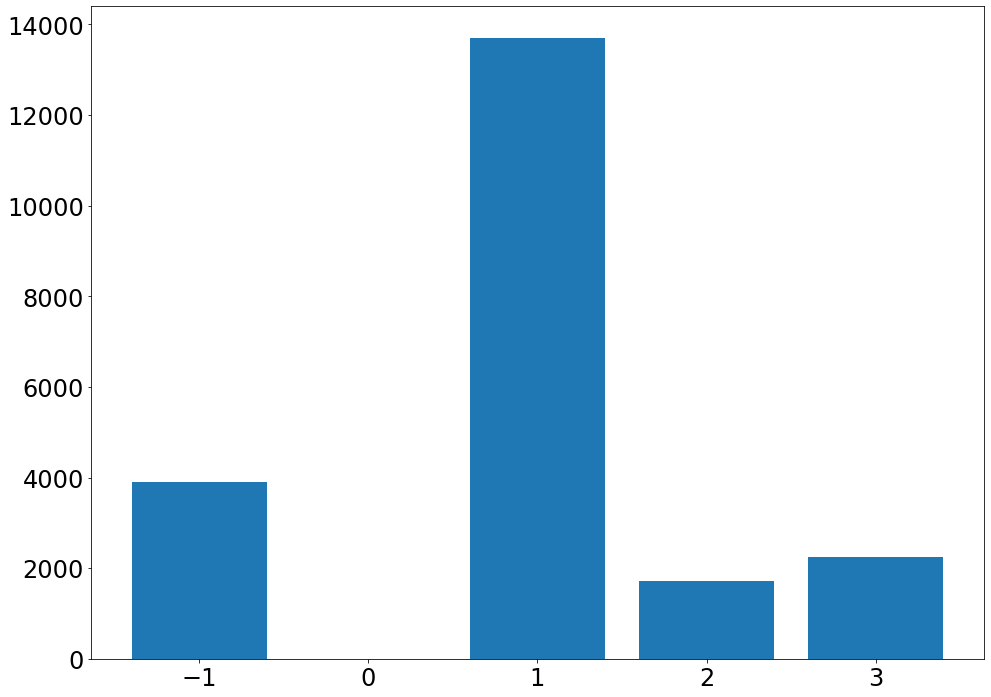

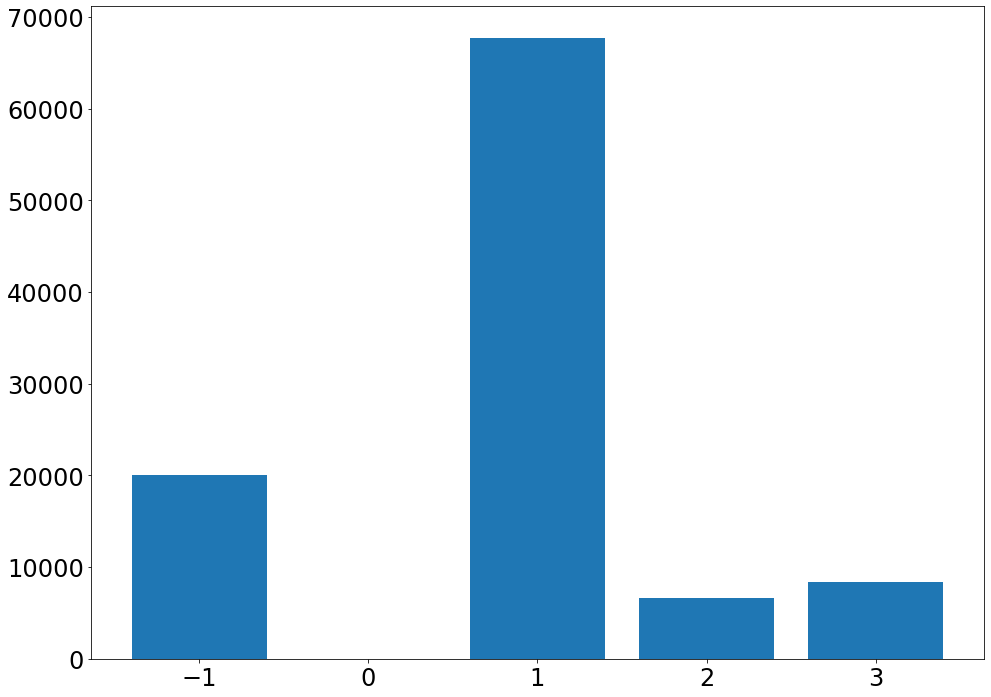

LSOA_OF_DRIVER


In [2]:
casualty_data = pd.read_csv("casualty_train.csv", delimiter=",")
vehicle_data = pd.read_csv("vehicle_train.csv", delimiter=",")

all_data = pd.merge(casualty_data, vehicle_data, on='accident_reference', how='outer')
print(all_data.columns)
print(len(all_data.columns))
print(list(all_data.columns))

# print("Features")
# print(casualty_data.columns)
# print("=====")

features = list(all_data.columns)

def fieldByAccidentCode(code, field):
    field_data = all_data.loc[:, field]
    final = {}
    
    for i in range(len(field_data)):
        key = field_data[i]
        if all_data["casualty_severity"][i] == code:
            if key not in final: final[key] = 0
            else: final[key] += 1
            
    return final

def getBasicStats(field):
    field_data = all_data.loc[:, field]
    
    print("Mean:", field_data.mean())
    print("Standard Deviation:", field_data.std())
    print("Variance:", field_data.var())
    
    print("Modal:", field_data.mode())
    print("Median:", field_data.median())
    
    
def constructBarChar(data):
    keys = data.keys()
    vals = data.values()
    fig, ax = plt.subplots()
    ax.bar(keys, vals)
#     ax.set_xlabel("Age")
#     ax.set_ylabel("Number of accidents")


print("\n\n")
count = 0
ignore = ["lsoa_of_casualty", "generic_make_model", "lsoa_of_driver"]
for feature in list(all_data.columns):
    print(feature.upper())
    if count == 0 or feature in ignore:
        count += 1
        continue
        
    try: 
        getBasicStats(feature)
    except: 
        pass
    
    print("\n\n")
    
    one_1 = fieldByAccidentCode(1, feature)
    one_2 = fieldByAccidentCode(2, feature)
    for key in one_1:
        if key in one_2: one_1[key] += one_2[key]
        
    for key in one_2:
        if key not in one_1: one_1[key] = one_2[key]
            
    one = one_1
    constructBarChar(one)
    plt.savefig(feature + "_1.png")
    two = fieldByAccidentCode(3, feature)
    constructBarChar(two)
    plt.savefig(feature + "_2.png")
        
        
        
    plt.show()

In [5]:
##Modelling

import numpy as np
from scipy import stats
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# %matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (16.0, 12.0)
pylab.rcParams['font.size'] = 24

import math
import xgboost as xgb
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import csv

casualty_data = pd.read_csv("casualty_train.csv", delimiter=",")
vehicle_data = pd.read_csv("vehicle_train.csv", delimiter=",")

all_data = pd.merge(casualty_data, vehicle_data, on='accident_reference', how='outer')


all_data["casualty_severity" == 2] = 1
all_data["casualty_severity" == 3] = 2
    
print(type(all_data.columns))

y = all_data["casualty_severity"]
all_data.drop(columns=ignore)

print("===")
print(all_data.head())
print("===")
X = all_data


print("Here")

standardizer = StandardScaler()
X = standardizer.fit_transform(X)
print("No Here")

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

models = {}
models['Logistic Regression'] = LogisticRegression()
models['Support Vector Machines'] = LinearSVC()
models['Decision Trees'] = DecisionTreeClassifier()
models['Random Forest'] = RandomForestClassifier()
models['Naive Bayes'] = GaussianNB()
models['K-Nearest Neighbor'] = KNeighborsClassifier()
models['XGBoost'] = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

accuracy, precision, recall, roc, f1 = {}, {}, {}, {}, {}

for key in models.keys():
    print("Next")
    models[key].fit(X_train, y_train)

    predictions = models[key].predict(X_test)

    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    roc[key] = roc_auc_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)

all_data_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'Roc', 'F1', "Summary"])

summary = {key: 0.5*(roc.get(key, 0) + f1.get(key, 0))
          for key in set(roc) | set(f1)}

all_data_model['Accuracy'] = accuracy.values()
all_data_model['Precision'] = precision.values()
all_data_model['Recall'] = recall.values()
all_data_model['Roc'] = roc.values()
all_data_model['F1'] = f1.values()
all_data_model['Summary'] = summary.values()

print(all_data_model)

all_data_model.to_csv("model.csv")


ModuleNotFoundError: No module named 'xgboost'